In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from matplotlib.patches import Rectangle
import cv2
import ipywidgets as widgets
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
import gc 

In [2]:
# cap = cv2.VideoCapture("./TRIM_Archana_ELAV_01_Feb-20_12-17.avi")
# number = 302

# cap = cv2.VideoCapture("./60fps/TRIM_3_jag_Set2_Apr-04_13-13.avi")
# number = 861

# cap = cv2.VideoCapture("./60fps/TRIM_4_jag_Set1_Apr-05_09-38.avi") # Try using mp4 video directly, may have to change codec
# number = 816

#Cut
# cap = cv2.VideoCapture("./60fps/Cut_Set1_July_10_2024/TRIM_1_Cut_Set1_July_10_2024.mp4")
# number = 871

# cap = cv2.VideoCapture("./60fps/Cut_Set1_July_10_2024/TRIM_2_Cut_Set1_July_10_2024.mp4")
# cap = cv2.VideoCapture("./60fps/Cut_Set3_July_16_2024/TRIM_1_Cut_Set3_July_16_2024.mp4")

trim_nums = [1, 2]
set = 2
# name = f"Dev_Set{set}_W1118_CUT_Aug_20_2024"
vid_dir = ""
name = f"Dev_SetRun{set}_W1118_CLK_out_2.5wk_Jan_31_2025"
# os.mkdir(f"./output/{name}_output")

In [3]:
cap = [i for i in range(len(trim_nums))]
print("Capturing Trims")
for i in range(len(trim_nums)):
    cap[i] = cv2.VideoCapture(f"./{vid_dir}{name}/TRIM_{trim_nums[i]}_{name}.mp4")
    print("Using", f"./{vid_dir}{name}/TRIM_{trim_nums[i]}_{name}.mp4")

print("\nInitializing Frames and Raw as numpy zeros")
trim_dict = [i for i in range(len(trim_nums))]
for i in tqdm(range(len(trim_nums))):
    trim_dict[i] = {}
    count = int(cap[i].get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap[i].get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap[i].get(cv2.CAP_PROP_FRAME_HEIGHT))

    trim_dict[i]["count"] = count
    trim_dict[i]["width"] = width
    trim_dict[i]["height"] = height

    print("Trim " + str(trim_nums[i]) + ": " + str(count) + " frames, " + str(height) + "x" + str(width))
    trim_dict[i]["frames"] = np.zeros((count, height, width), dtype=np.float32)
    trim_dict[i]["raw"] = np.zeros((count, height, width, 3), dtype=np.uint8)
    trim_dict[i]["fg bin"] = np.zeros((count, height, width), dtype=np.uint8)

Capturing Trims
Using ./Dev_SetRun2_W1118_CLK_out_2.5wk_Jan_31_2025/TRIM_1_Dev_SetRun2_W1118_CLK_out_2.5wk_Jan_31_2025.mp4
Using ./Dev_SetRun2_W1118_CLK_out_2.5wk_Jan_31_2025/TRIM_2_Dev_SetRun2_W1118_CLK_out_2.5wk_Jan_31_2025.mp4

Initializing Frames and Raw as numpy zeros


100%|██████████| 2/2 [00:00<00:00, 745.06it/s]

Trim 1: 871 frames, 720x1280
Trim 2: 871 frames, 720x1280


In [4]:
"""
trim_dict {

    0:
        int (frame) count
        int width
        int height

        frames [np]
        raw [np]
        fg_bin [np]

        vials {
            4:
                {
                    n:
                    x1:
                    x2:
                    y1:
                    y2:
                    fr:
                    fly sizes:
                    points:
                    n_groups:
                    single_thresh:
                    residual:
                }
            5: {}
            6: {}
            7: {}
            (which ever needed)
        }

    1:



    2:



    3:



    4:
}
(everything 0 indexed)


"""

'\ntrim_dict {\n\n    0:\n        int (frame) count\n        int width\n        int height\n\n        frames [np]\n        raw [np]\n        fg_bin [np]\n\n        vials {\n            4:\n                {\n                    n:\n                    x1:\n                    x2:\n                    y1:\n                    y2:\n                    fr:\n                    fly sizes:\n                    points:\n                    n_groups:\n                    single_thresh:\n                    residual:\n                }\n            5: {}\n            6: {}\n            7: {}\n            (which ever needed)\n        }\n\n    1:\n\n\n\n    2:\n\n\n\n    3:\n\n\n\n    4:\n}\n(everything 0 indexed)\n\n\n'

In [5]:
print("Making Frames and Raw lists\n")

for t in range(len(trim_nums)):
    print("Trim", trim_nums[t])
    for f in tqdm(range(trim_dict[t]["count"])):
        ret, frame = cap[t].read()

        if ret is False:
            print("Could not read trim", t+1, "frame", f)
            break

        trim_dict[t]["raw"][f] = frame

        frame_avg = frame.mean(axis=2)
        frame = (frame_avg*128) / frame_avg.mean()
        trim_dict[t]["frames"][f] = frame

    cap[t].release()
    cap[t] = 0
    gc.collect()
    print()
    
del cap;
gc.collect()

Making Frames and Raw lists

Trim 1


100%|██████████| 871/871 [00:16<00:00, 52.68it/s]



Trim 2


100%|██████████| 871/871 [00:16<00:00, 52.60it/s]


0

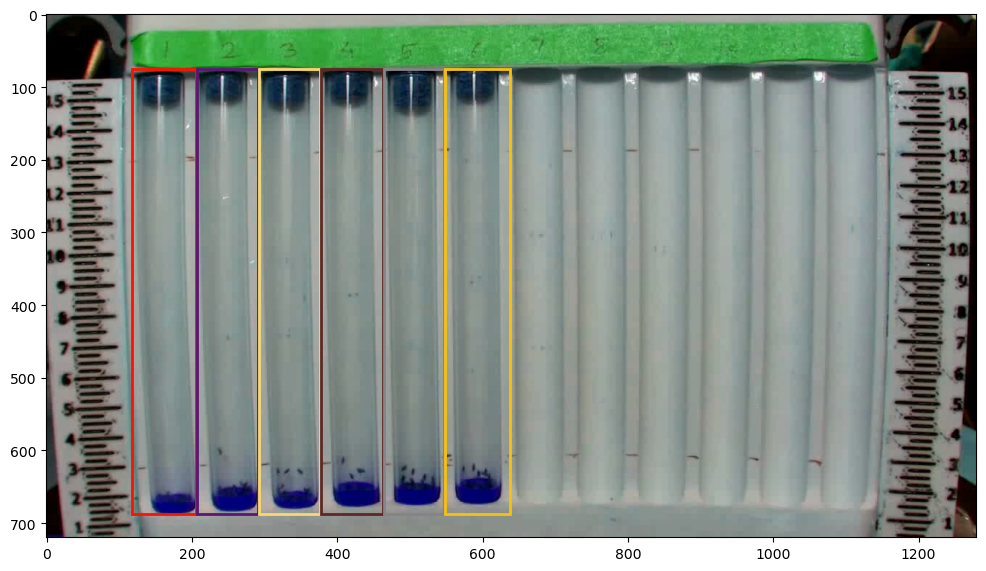

In [6]:
gc.collect()
colors = [
    "#ff1100", "#561873", "#f7d872", "#5c2926","#878386",
    "#f7c10c", "#ff6e63", "#89e81c", "#678f39","#2d36ad",
    "#2d6946", "#12db66", "#2fb8d4", "#557f87", "#2d4018",
    "#234e57", "#6066b5", "#9a60b5", "#d1288d", "#533278"
]

# Archana
# x1=120
# y1=75
# x2=205
# y2=680
# n = 6

# Trim 3
# x1 = 530
# y1 = 90
# x2 = 610
# y2 = 680
# n = 6

# Trim 4
# x1 = 545
# y1 = 90
# x2 = 625
# y2 = 680
# n = 11

# Cut Set 1
# Vial 2
# x1 = 552
# y1 = 72
# x2 = 635
# y2 = 675
# n = 10
# Vial 3
# x1 = 637
# y1 = 80
# x2 = 724
# y2 = 675
# n=10

# Cut Set 3 July 16 Trim 1
# Vial 3
# x1 = 650
# y1 = 75
# x2 = 726
# y2 = 675
# n=10
# Vial 4
# x1 = 735
# y1 = 75
# x2 = 815
# y2 = 675
# n=10

# Cut Set 4 July 19 (New lighting)
x_off = -15

# Vial Number : [x1, x2, y1, y2, num_flies, single_thresh, double_thresh]
    # 4: [478+x_off, 559+x_off, 78, 675, 5, 4],
    # 5: [565+x_off, 648+x_off, 78, 675, 10, 4],
    # 6: [652+x_off, 733+x_off, 78, 675, 15, 4],
    # 7: [738+x_off, 819+x_off, 78, 675, 20, 4]
vials = {
    0: [117, 206, 75, 688, 10, 2, 100],
    1: [207, 291, 75, 688, 15, 2, 100],
    2: [292, 376, 75, 688, 20, 2, 100],
    3: [377, 463, 75, 688, 10, 2, 100],
    4: [464, 547, 75, 688, 15, 2, 100],
    5: [548, 637, 75, 688, 20, 2, 100],
}

plt.figure(figsize=(12, 12))
for v in vials.keys():
    rect = Rectangle((vials[v][0], vials[v][2]), vials[v][1]-vials[v][0], vials[v][3]-vials[v][2], linewidth=2, edgecolor=colors[v], facecolor='none')
    plt.gca().add_patch(rect)

plt.imshow(trim_dict[0]["raw"][0])
plt.show()



In [7]:
print("Finding max of Frames for bg")

for t in tqdm(range(len(trim_nums))):
    trim_dict[t]["bg"] = np.max(trim_dict[t]["frames"], axis = 0)

Finding max of Frames for bg


100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


In [8]:
print("Making fg bin\n")

for t in range(len(trim_nums)):
    print("Trim", trim_nums[t])

    for f in tqdm(range(trim_dict[t]["count"])):
        frame = trim_dict[t]["frames"][f]-trim_dict[t]["bg"]
        frame = (frame-frame.min()) / (frame.max() - frame.min()) * 255

        trim_dict[t]["fg bin"][f] = (frame < (0.73*255))
    print()

Making fg bin

Trim 1


100%|██████████| 871/871 [00:01<00:00, 470.17it/s]



Trim 2


100%|██████████| 871/871 [00:01<00:00, 471.16it/s]

In [9]:
for t in range(len(trim_nums)):
    trim_dict[t]["vials"] = {}
    for vial_num in vials.keys():
        trim_dict[t]["vials"][vial_num] = {}

        trim_dict[t]["vials"][vial_num]["x1"] = vials[vial_num][0]
        trim_dict[t]["vials"][vial_num]["x2"] = vials[vial_num][1]
        trim_dict[t]["vials"][vial_num]["y1"] = vials[vial_num][2]
        trim_dict[t]["vials"][vial_num]["y2"] = vials[vial_num][3]

        trim_dict[t]["vials"][vial_num]["n flies"] = vials[vial_num][4]

        trim_dict[t]["vials"][vial_num]["single threshold"] = vials[vial_num][5]
        trim_dict[t]["vials"][vial_num]["double threshold"] = vials[vial_num][6]

Make cropped raw frames for each vial

Trim 1
       Vial 0


100%|██████████| 871/871 [00:00<00:00, 8949.34it/s]


       Vial 1


100%|██████████| 871/871 [00:00<00:00, 9030.85it/s]


       Vial 2


100%|██████████| 871/871 [00:00<00:00, 9052.31it/s]


       Vial 3


100%|██████████| 871/871 [00:00<00:00, 9137.19it/s]


       Vial 4


100%|██████████| 871/871 [00:00<00:00, 9388.10it/s]


       Vial 5


100%|██████████| 871/871 [00:00<00:00, 8619.20it/s]



Trim 2
       Vial 0


100%|██████████| 871/871 [00:00<00:00, 9165.66it/s]


       Vial 1


100%|██████████| 871/871 [00:00<00:00, 9001.27it/s]


       Vial 2


100%|██████████| 871/871 [00:00<00:00, 9153.81it/s]


       Vial 3


100%|██████████| 871/871 [00:00<00:00, 9150.32it/s]


       Vial 4


100%|██████████| 871/871 [00:00<00:00, 9482.73it/s]


       Vial 5


100%|██████████| 871/871 [00:00<00:00, 8529.07it/s]


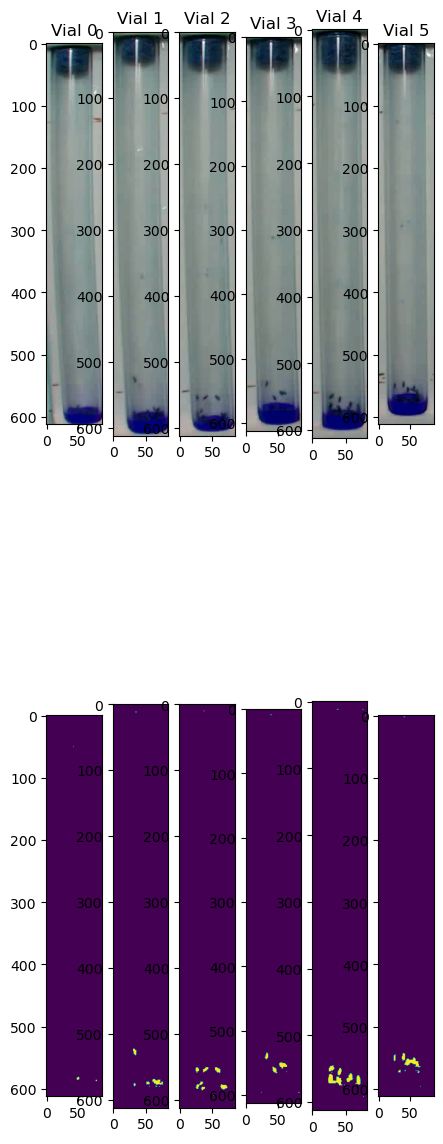

In [10]:
print("Make cropped raw frames for each vial\n")

for t in range(len(trim_nums)):
    print("Trim", trim_nums[t])
    for v in trim_dict[t]["vials"].keys():
        print("       Vial", v)

        trim_dict[t]["vials"][v]["c raw"] = np.zeros(
            (   
                trim_dict[t]["count"],
                trim_dict[t]["vials"][v]["y2"]-trim_dict[t]["vials"][v]["y1"],
                trim_dict[t]["vials"][v]["x2"]-trim_dict[t]["vials"][v]["x1"],
                3
            ),
            dtype=np.uint8
        )
        trim_dict[t]["vials"][v]["c bin"] = np.zeros(
            (   
                trim_dict[t]["count"],
                trim_dict[t]["vials"][v]["y2"]-trim_dict[t]["vials"][v]["y1"],
                trim_dict[t]["vials"][v]["x2"]-trim_dict[t]["vials"][v]["x1"],
            ),
            dtype=np.uint8
        )

        for f in tqdm(range(trim_dict[t]["count"])):
            trim_dict[t]["vials"][v]["c raw"][f] = trim_dict[t]["raw"][f][
                trim_dict[t]["vials"][v]["y1"]:trim_dict[t]["vials"][v]["y2"],
                trim_dict[t]["vials"][v]["x1"]:trim_dict[t]["vials"][v]["x2"]
            ]
            trim_dict[t]["vials"][v]["c bin"][f] = trim_dict[t]["fg bin"][f][
                trim_dict[t]["vials"][v]["y1"]:trim_dict[t]["vials"][v]["y2"],
                trim_dict[t]["vials"][v]["x1"]:trim_dict[t]["vials"][v]["x2"]
            ]
    print()

fig, axes = plt.subplots(2, len(vials), figsize=(5, len(trim_nums)*8))

for i in range(len(vials)):
    axes[0][i].set_title("Vial " + str([j for j in vials.keys()][i]))
    axes[0][i].imshow(trim_dict[0]["vials"][[j for j in vials.keys()][i]]["c raw"][0])
    axes[1][i].imshow(trim_dict[0]["vials"][[j for j in vials.keys()][i]]["c bin"][0])

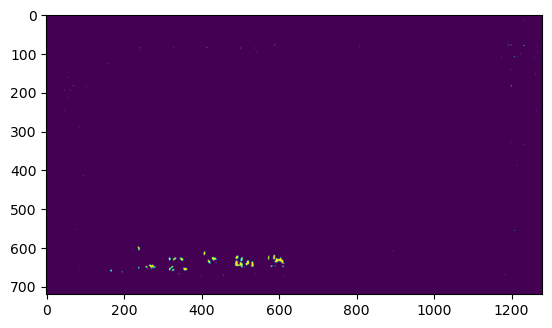

In [11]:
plt.imshow(trim_dict[0]["fg bin"][0])

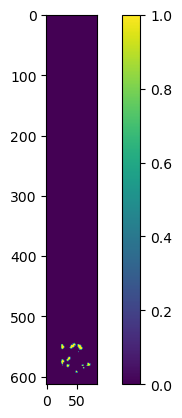

In [12]:
plt.imshow(trim_dict[0]["vials"][2]["c bin"][4])
plt.colorbar()

In [30]:
def connectComp(t, v, f, overlap=False, print_areas=False):
    frame = trim_dict[t]["vials"][v]["c bin"][f]
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(frame, 8, cv2.CV_16U)
    output = np.zeros(frame.shape, dtype="uint8")
    centroid_points = []
    
    final_labels = num_labels
    extra = 0;

    for i in range(1, num_labels): 
        area = stats[i, cv2.CC_STAT_AREA]
        if print_areas: print(area)
        if trim_dict[t]["vials"][v]["single threshold"] < area < trim_dict[t]["vials"][v]["double threshold"]:
            componentMask = (labels == i).astype("uint8") * 255
            output = cv2.bitwise_or(output, componentMask)
            cX, cY = centroids[i]
            centroid_points.append((round(cX, 0), round(cY, 0)))
        elif area > trim_dict[t]["vials"][v]["double threshold"] and overlap:
            componentMask = (labels == i).astype("uint8") * 255
            output = cv2.bitwise_or(output, componentMask)
            cX, cY = centroids[i]
            centroid_points.append((round(cX, 0), round(cY, 0)))
            for j in range(area // trim_dict[t]["vials"][v]["double threshold"]):
                cX, cY = centroids[i]
                cX+=2*(j+1)
                cY+=2*(j+1)
                centroid_points.append((round(cX, 0), round(cY, 0)))
                final_labels+=1;
        else: extra+=1
                
    if overlap: return final_labels-1-extra, output, centroid_points, final_labels-num_labels
    else: return num_labels-1-extra, output, centroid_points

1
34
40
96
12
Spots: 4 With 0 doubled
(63.0, 562.0)
(59.0, 577.0)
(78.0, 582.0)
(34.0, 578.0)


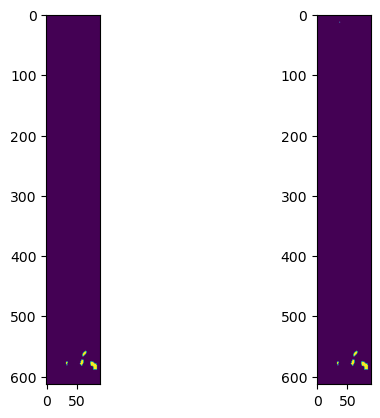

In [31]:
def compareComp(t, v, f):
    num_labels, output, centroids, doubled = connectComp(t, v, f, overlap=True, print_areas=True)

    fig, axes = plt.subplots(1, 2)

    axes[0].imshow(output)
    axes[1].imshow(trim_dict[t]["vials"][v]["c bin"][f])
    print("Spots:", num_labels, "With", doubled, "doubled")
    for c in centroids: print(c)
    
compareComp(0, 0, 15)

In [32]:
print(trim_dict[0]["vials"][1]["single threshold"])
print(trim_dict[0]["vials"][1]["double threshold"])

2
100


In [33]:
"""

Steps:

1. Find components (flies) in two adjacent frames
* Done through background subtraction, finished

2. Add adjacent frames, find region of overlap (where frames sum to 2)
* Region of overlap is found by get_sum method, finished

3. Link overlapping components from adjacent frames
* Not implemented yet. If no overlap found for some components, skip it 
* If only one component is not linked between two frames, you can infer that they are linked

4. Add to a list of the path of individual flies
* Easy to do one components are linked

# Save images from plot into folders, can use cv2 to stitch together into video

"""

'\n\nSteps:\n\n1. Find components (flies) in two adjacent frames\n* Done through background subtraction, finished\n\n2. Add adjacent frames, find region of overlap (where frames sum to 2)\n* Region of overlap is found by get_sum method, finished\n\n3. Link overlapping components from adjacent frames\n* Not implemented yet. If no overlap found for some components, skip it \n* If only one component is not linked between two frames, you can infer that they are linked\n\n4. Add to a list of the path of individual flies\n* Easy to do one components are linked\n\n# Save images from plot into folders, can use cv2 to stitch together into video\n\n'

In [34]:
def get_distance(p1, p2):
    return ((((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2))**(0.5));

In [35]:
# Change analyze threshold system so it just finds 6 biggest instead above a threshold
# Check if this fixes analyzing, and groups getting linked to same group

In [43]:
print("Analyze all frames of each trim for each vial")

for t in range(len(trim_nums)):
    print("Trim", trim_nums[t])
    for v in vials.keys():
        print("       Vial", v)
        analyzed = []
        for f in tqdm(range(trim_dict[t]["count"])):
            analyzed.append(connectComp(t, v, f, overlap=True))
        trim_dict[t]["vials"][v]["analyzed"] = analyzed
    print()

# flies detected, frame_output, lc, num_doubled

Analyze all frames of each trim for each vial
Trim 1
       Vial 0


100%|██████████| 871/871 [00:00<00:00, 2945.95it/s]


       Vial 1


100%|██████████| 871/871 [00:00<00:00, 2883.08it/s]


       Vial 2


100%|██████████| 871/871 [00:00<00:00, 2312.09it/s]


       Vial 3


100%|██████████| 871/871 [00:00<00:00, 3354.10it/s]


       Vial 4


100%|██████████| 871/871 [00:00<00:00, 1936.28it/s]


       Vial 5


100%|██████████| 871/871 [00:00<00:00, 2012.95it/s]



Trim 2
       Vial 0


100%|██████████| 871/871 [00:00<00:00, 2996.82it/s]


       Vial 1


100%|██████████| 871/871 [00:00<00:00, 2613.81it/s]


       Vial 2


100%|██████████| 871/871 [00:00<00:00, 2153.14it/s]


       Vial 3


100%|██████████| 871/871 [00:00<00:00, 2994.42it/s]


       Vial 4


100%|██████████| 871/871 [00:00<00:00, 1945.63it/s]


       Vial 5


100%|██████████| 871/871 [00:00<00:00, 2063.99it/s]

Frame 15 
 4 Components: 
Group 1 is (63.0, 562.0)
Group 2 is (59.0, 577.0)
Group 3 is (78.0, 582.0)
Group 4 is (34.0, 578.0)


[]

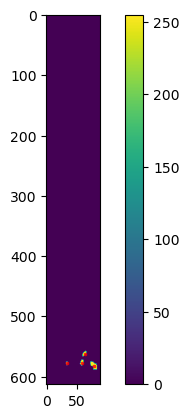

In [44]:
# Testing
f = 15

results = trim_dict[0]["vials"][0]["analyzed"][f]
plt.imshow(results[1])
plt.colorbar()

print("Frame", f, "\n", results[0], "Components: ")
dotx = []
doty = []
for i in range(results[0]):
    print("Group", i+1, "is", results[2][i])
    doty.append(results[2][i][1])
    dotx.append(results[2][i][0]);
plt.scatter(dotx, doty, marker = "x", c="r", s=3, alpha=0.8)
plt.plot()

In [45]:
results

(4,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 [(63.0, 562.0), (59.0, 577.0), (78.0, 582.0), (34.0, 578.0)],
 0)

Finding original number of detected flies per frame and number of pixels each takes

Trim 1
       Vial 0


100%|██████████| 871/871 [00:00<00:00, 2792996.01it/s]


       Vial 1


100%|██████████| 871/871 [00:00<00:00, 2801563.48it/s]


       Vial 2


100%|██████████| 871/871 [00:00<00:00, 2810183.68it/s]


       Vial 3


100%|██████████| 871/871 [00:00<00:00, 2682260.49it/s]


       Vial 4


100%|██████████| 871/871 [00:00<00:00, 2827584.20it/s]


       Vial 5


100%|██████████| 871/871 [00:00<00:00, 2849640.24it/s]



Trim 2
       Vial 0


100%|██████████| 871/871 [00:00<00:00, 2816683.72it/s]


       Vial 1


100%|██████████| 871/871 [00:00<00:00, 2821033.81it/s]


       Vial 2


100%|██████████| 871/871 [00:00<00:00, 2863039.80it/s]


       Vial 3


100%|██████████| 871/871 [00:00<00:00, 2818857.09it/s]


       Vial 4


100%|██████████| 871/871 [00:00<00:00, 2761329.39it/s]


       Vial 5


100%|██████████| 871/871 [00:00<00:00, 2887935.80it/s]

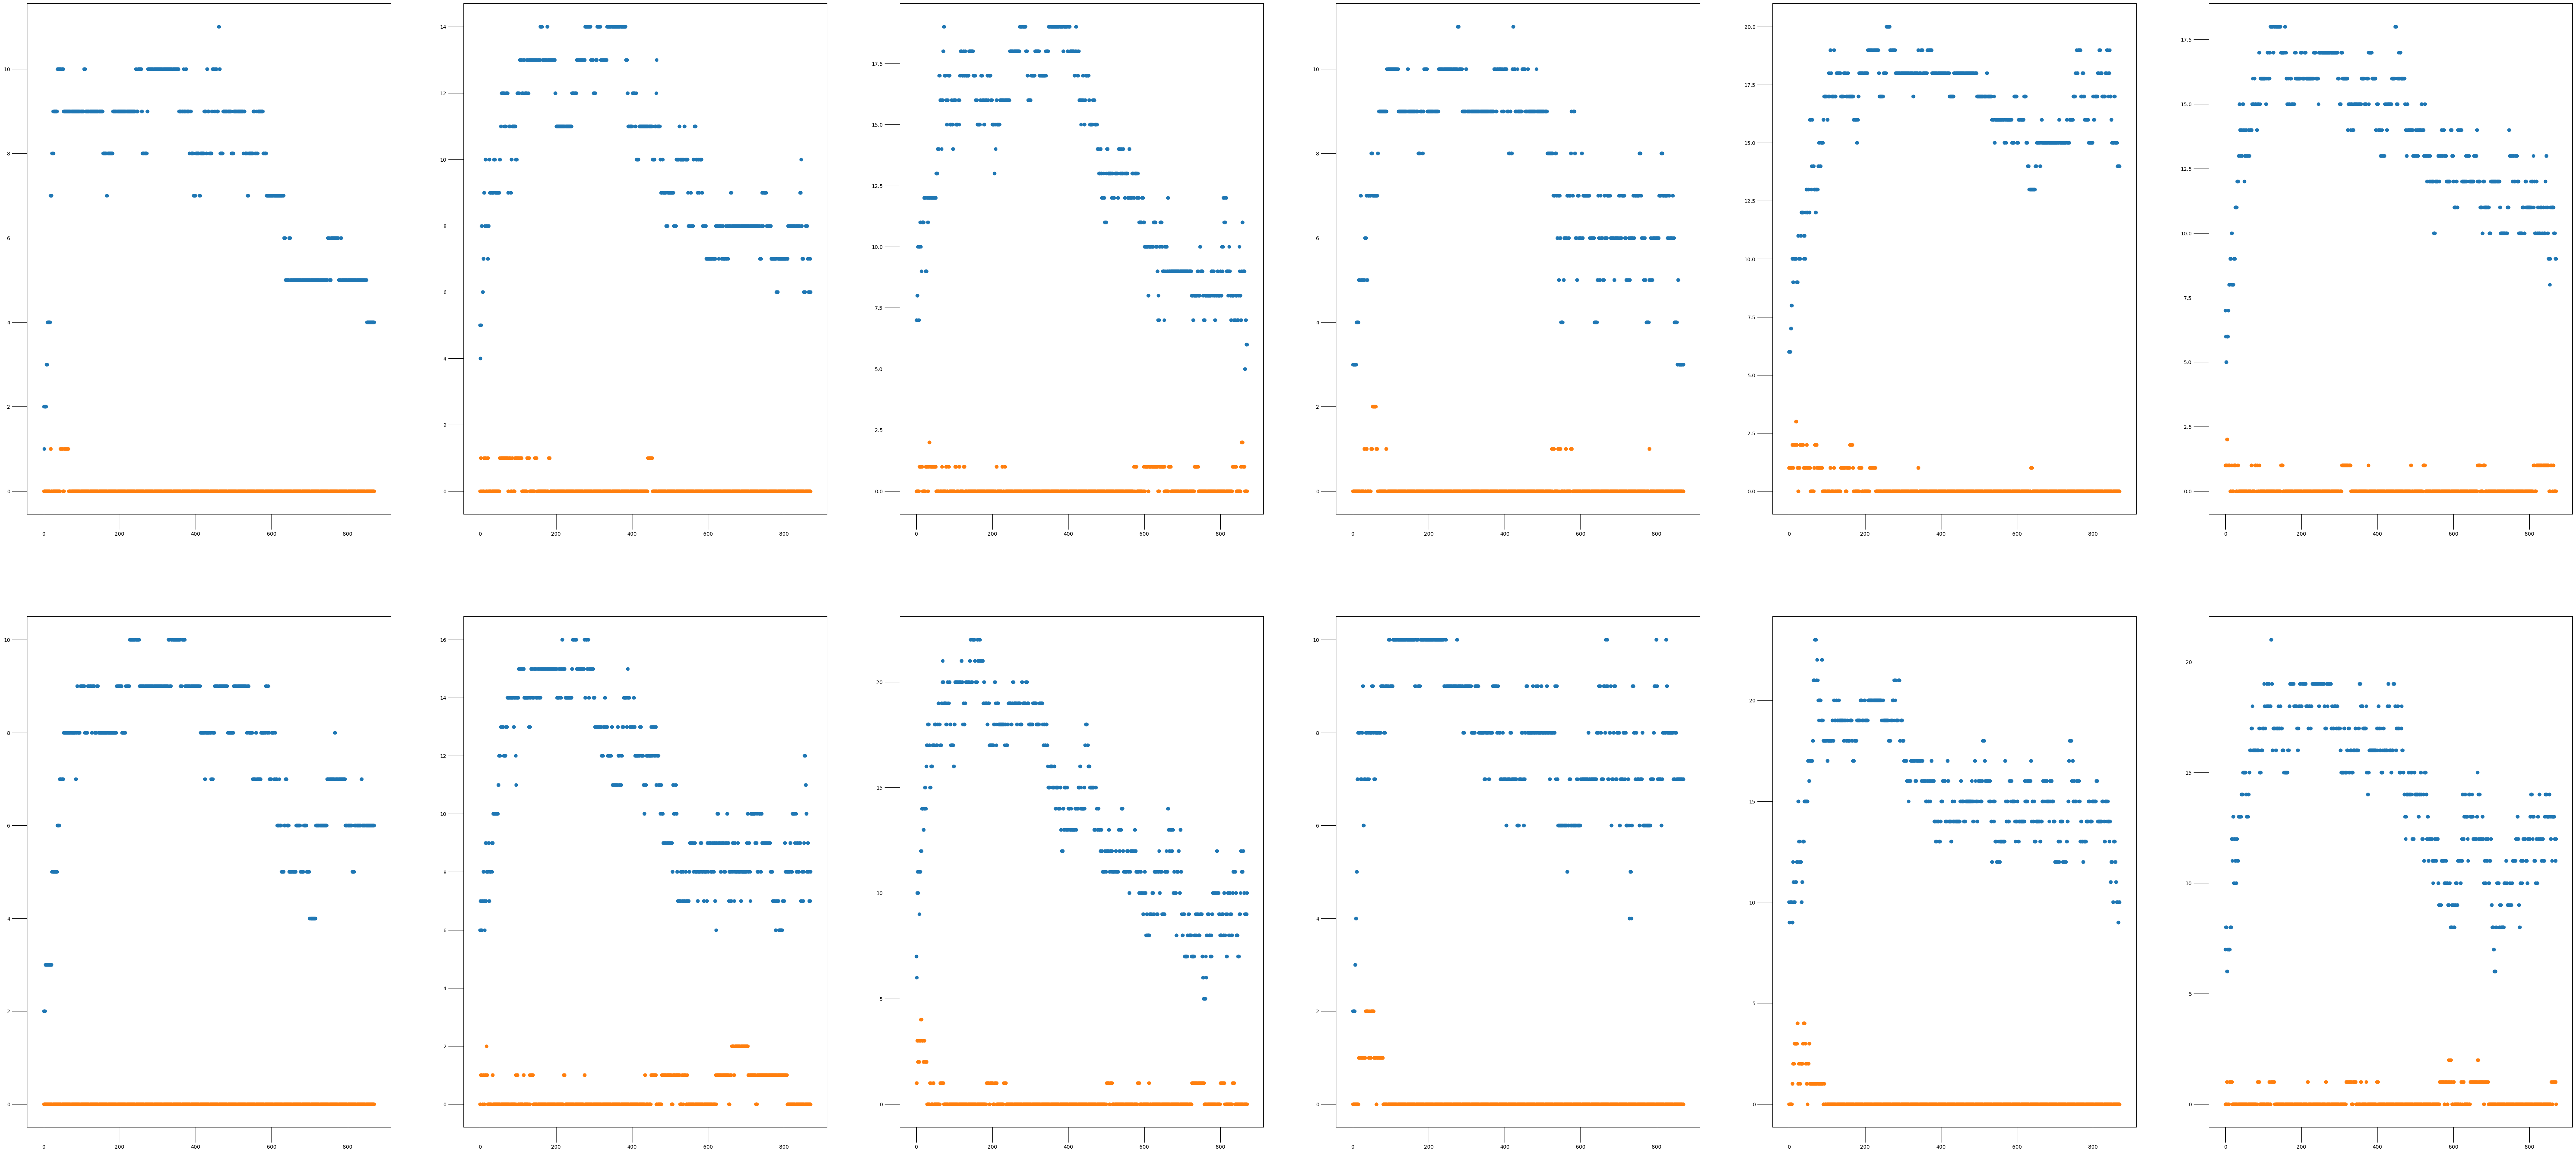

In [60]:
print("Finding original number of detected flies per frame and number of pixels each takes\n")

for t in range(len(trim_nums)):
    print("Trim", trim_nums[t])
    for v in vials.keys():
        print("       Vial", v)
        
        n_groups = []
        for f in tqdm(range(trim_dict[t]["count"])):
            n_groups.append(trim_dict[t]["vials"][v]["analyzed"][f][0])
        trim_dict[t]["vials"][v]["n groups"] = n_groups
        
        try:
            n_doubled = []
            for f in tqdm(range(trim_dict[t]["count"])):
                n_doubled.append(trim_dict[t]["vials"][v]["analyzed"][f][3])
            trim_dict[t]["vials"][v]["n doubled"] = n_doubled
        except:
            print("Double Setting Off")
            
    print()

fig, axes = plt.subplots(len(trim_nums), len(vials), figsize = (len(vials)*15, len(trim_nums*20)))

# for i in range(len(vials)): axes[len(trim_nums)][i].set_title("Vial " + str([j for j in vials.keys()][i]))
# for i in range(len(vials)): axes[len(trim_nums)][i].set_title("Vial " + str([j for j in vials.keys()][i]))

for t in range(len(trim_nums)):
    for v in range(len(vials)):
        axes[t][v].scatter([i for i in range(trim_dict[t]["count"])], trim_dict[t]["vials"][[j for j in vials.keys()][v]]["n groups"])
        axes[t][v].scatter([i for i in range(trim_dict[t]["count"])], trim_dict[t]["vials"][[j for j in vials.keys()][v]]["n doubled"])
        axes[t][v].tick_params(axis='both', which='major', size=30)

# plt.savefig(f"./output/{name}_output/og_detected_flies_Trim{trim_nums}_Vial{[i for i in vials.keys()]}.png")

In [ ]:
# Could have seperate uses for number of flies vs max number of flies in any frame

In [129]:
def find_mins(present, last, remember_ind):
    min_distance = []

    for p in range(len(present)): # First index is paired present location, second is old paired location
        min_dist = 9999
        index = -1
        if present[p] == [-1, -1]:
            continue;

        for l in range(len(last)):
            if (last[l] == [-1, -1]):
                continue;
    
            distance = get_distance(present[p], last[l])
            if (l in remember_ind): distance +=10
            
            if distance<min_dist:
                min_dist = distance
                index = l;
        min_distance.append([min_dist, p, index]) # minimum distance, present, old
    return min_distance

"""def smallest_min(min_distance):
    min_dist = 999
    new_index = -1
    old_index = -1

    for i in range in (len(min_distance)):
        if min_distance[i][0]<min_dist:
            min_dist = min_distance[i][0]
            new_index = i
            old_index = min_distance[i][1]
            
    return (min_dist, new_index, old_index);"""



'def smallest_min(min_distance):\n    min_dist = 999\n    new_index = -1\n    old_index = -1\n\n    for i in range in (len(min_distance)):\n        if min_distance[i][0]<min_dist:\n            min_dist = min_distance[i][0]\n            new_index = i\n            old_index = min_distance[i][1]\n            \n    return (min_dist, new_index, old_index);'

In [132]:
# Pair closest
# flies detected, frame_output, lc, num_doubled

# when recalculating min dists, can rep dist in vector form so more efficient, look into using graph and nodes if needed
def get_points(t, v):
    clc = [a[2] for a in trim_dict[t]["vials"][v]["analyzed"]]
    points = [[]];
    
    # stop=[]
    
    n = trim_dict[t]["vials"][v]["n flies"]
    for g in range(len(clc[0])): # Put in first frame values
        points[0].append(clc[0][g]);
    for r in range(n-len(clc[0])):
        points[0].append([-1, -1]) # (-1, -1) = invalid, not in frame

    residuals = []

    found = len(clc[0])
    remember = [[-1, -1] for i in range(n)]

    for frame in range(1, len(clc)): # for each frame
        last = points[frame-1][:]
        present = clc[frame][:]

        remember_ind = [] # Adding remember into last and figuring out ind to take out
        for re in range(len(remember)):
            if remember[re] != [-1, -1]:
                remember_ind.append(re)
                # if last[re] != [-1, -1]:it's possible it's just rewriting the same remember from last frame
                last[re] = remember[re]

        positions = [[-1, -1] for i in range(n)]

        new_need = [i for i in range(len(present))] # New groups that need to be paired
        old_need = []                               # Old groups that need to be paired
        for i in range(len(last)):
            if last[i] != [-1, -1]:
                old_need.append(i)
                
        frame_residuals = []

        min_distance = sorted(find_mins(present, last, remember_ind)) # For each group: [min_dist, paired new index, closest old index]

        # if (frame in stop):
        #     print("Yee")
            # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
            # ax1.imshow(fg_bin[frame-1])
            # ax2.imshow(fg_bin[frame])
            # for t in range(len(min_distance)):
            #     ax1.plot([clc[frame-1][min_distance[t][2]][1],clc[frame][min_distance[t][1]][1]],[clc[frame-1][min_distance[t][2]][0],clc[frame][min_distance[t][1]][0]], marker = "+")
            # for t in range(len(lc[frame-1])):
            #     ax1.scatter([lc[frame-1][t][1]], [lc[frame-1][t][0]], s=1)
            # for t in range(len(lc[frame])):
            #     ax2.scatter([lc[frame][t][1]], [lc[frame][t][0]], s=1)

        for o in range(len(old_need)):
            if len(new_need)>0:
                if (min_distance[o][2] not in old_need or min_distance[o][1] not in new_need):
                    del min_distance[o:]
                    f_present = [[-1, -1] for i in present]
                    f_last = [[-1, -1] for i in last]
                    for ne in new_need:
                        f_present[ne] = present[ne]
                    for ol in old_need:
                        f_last[ol] = last[ol]
                    for item in sorted(find_mins(f_present, f_last, remember_ind)):
                        min_distance.append(item)

                positions[min_distance[o][2]] = present[min_distance[o][1]]
                frame_residuals.append(round(min_distance[o][0], 2))

                if min_distance[o][2] in remember_ind:
                    remember[min_distance[o][2]] = [-1, -1]
                old_need.remove(min_distance[o][2])
                new_need.remove(min_distance[o][1])
            else: # Should not get here before new, all new paired, old leftover and remember
                break;
        
        for ol in old_need:
            remember[ol] = last[ol]

        if (len(present)>found):
            old_found = found
            found = len(present)
            i = 0
            for ne in new_need:
                positions[old_found+i] = present[ne][:]
                i+=1;

        points.append(positions)
        residuals.append(frame_residuals)

    trim_dict[t]["vials"][v]["points"] = points
    trim_dict[t]["vials"][v]["residuals"] = residuals;

for t in range(len(trim_nums)):
    print("Trim", trim_nums[t])
    for v in tqdm(vials.keys()):
        get_points(t, v)
    print()


Trim 1


  0%|          | 0/6 [00:00<?, ?it/s]


IndexError: list assignment index out of range

Trim 3 Residuals


100%|██████████| 2/2 [00:00<00:00, 19.40it/s]



Trim 4 Residuals


100%|██████████| 2/2 [00:00<00:00, 20.49it/s]


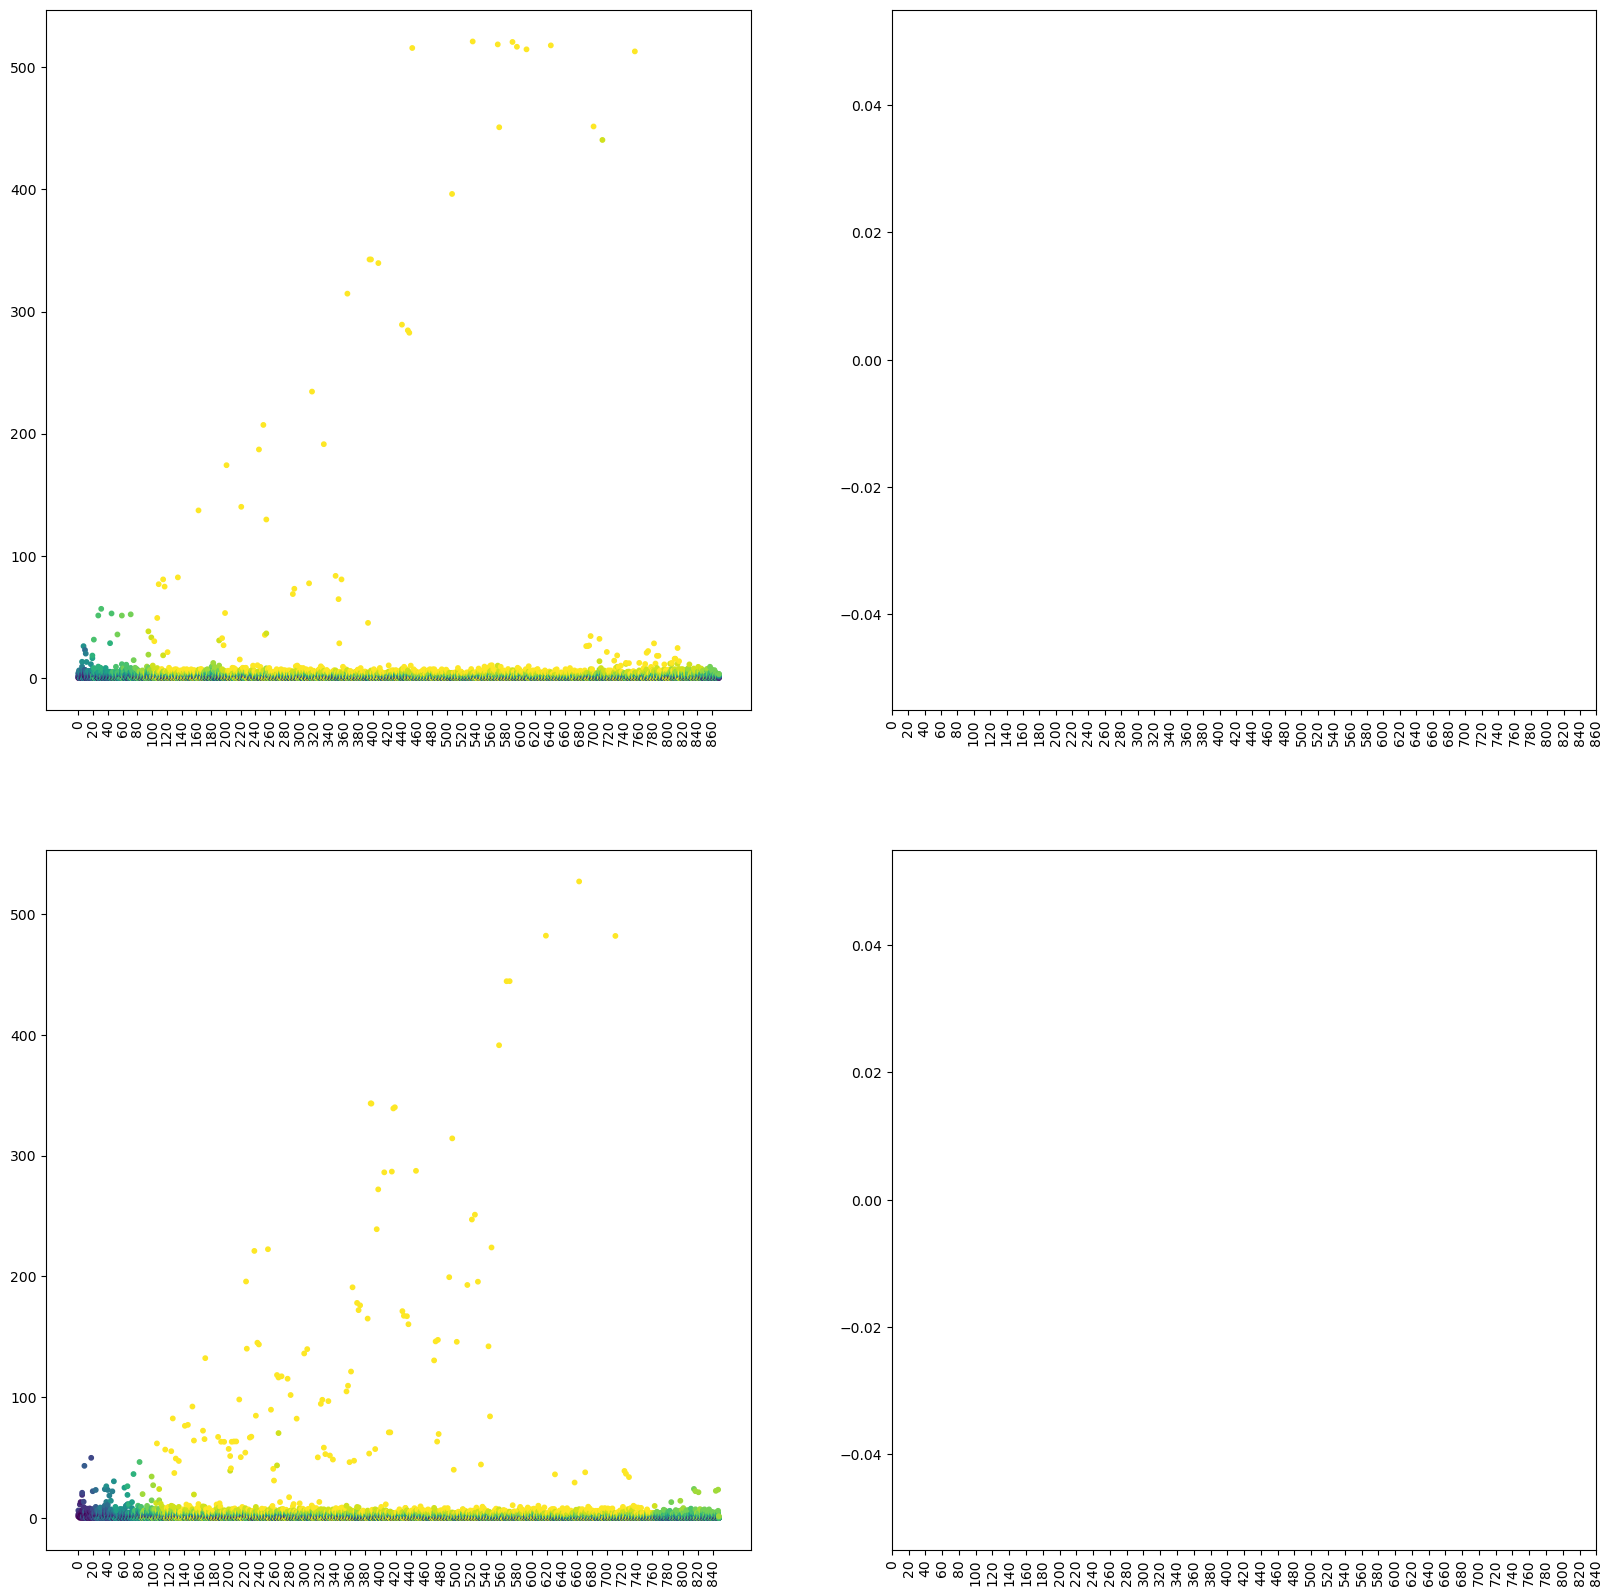

In [24]:
fig, axes = plt.subplots(len(trim_nums), len(vials), figsize=(len(vials)*10, len(trim_nums)*10))
if (len(trim_nums))==1 : axes = [axes]

for t in range(len(trim_nums)):
    print("Trim", trim_nums[t], "Residuals")
    v_num = 0
    for v in tqdm(vials.keys()):
        x = []
        y = []
        c_s = []
        for r in range(len(trim_dict[t]["vials"][v]["residuals"])):
            for c in range(len(trim_dict[t]["vials"][v]["residuals"][r])):
                x.append(r)
                y.append(trim_dict[t]["vials"][v]["residuals"][r][c])
                c_s.append(c)
        axes[t][v_num].scatter(x, y, c = c_s, s=10)
        axes[t][v_num].set_xticks(np.arange(0, trim_dict[t]["count"], 20))
        axes[t][v_num].tick_params(axis='x', labelrotation=90)
        v_num+=1
    print()

plt.savefig(f"./output/{name}_output/Residuals_Trim{trim_nums}_Vial{[i for i in vials.keys()]}.png")

In [25]:
for t in range(len(trim_nums)):
    print("Trim", trim_nums[t])

    for v in tqdm(vials.keys()):
        points = trim_dict[t]["vials"][v]["points"]
        filtered_points = []
        last = [[-1, -1] for i in range(trim_dict[t]["vials"][v]["n flies"])]

        for f in range(trim_dict[t]["count"]):
            filtered_points.append([[-1, -1] for i in range(trim_dict[t]["vials"][v]["n flies"])])
            for g in range(trim_dict[t]["vials"][v]["n flies"]):
                if points[f][g][0]>520 or points[f][g][0]<100:
                    continue
                if points[f][g]==[-1, -1]:
                    continue
                elif last[g] == [-1, -1]:
                    last[g] = points[f][g]
                    filtered_points[f][g] = points[f][g]
                elif last[g][0]-points[f][g][0]>=-10:
                    last[g] = points[f][g]
                    filtered_points[f][g] = points[f][g]
        
        trim_dict[t]["vials"][v]["filtered points"] = filtered_points


Trim 3


100%|██████████| 2/2 [00:00<00:00, 157.38it/s]


Trim 4


100%|██████████| 2/2 [00:00<00:00, 167.78it/s]


In [26]:
"""

    [   
                                distance
            old     g1    g2    g3    g4    g5    g6           col count = len(last)
        new
        #1        [  a,    b,    c,    d,    e,    f  ]
        #2        []
        #3        []
        #4        []
        #5        []
        #6        []

row count = len(present)

    ]

"""
"""

min_distance:
    [
        #1    [shortest dist to old, closest old group #]
        #2    []
        #3    []
        #4    []
        #6    []
        #5    []
    ]

    
6 --> 5
Pair 5, remember 6th

5 --> 6 after remember
Pair 5, pair 6th with remembered

5 --> 6 w/o remember
Pair 5, start 6th

- Take out jumps in a filtered version of the pots (only want to measure speed of movement of flies)
- Make sure 10 flies analysis works, get cleaner videos from Dave
- Make sure current analysis algorithm is not the problem for the 10 flies
"""

'\n\nmin_distance:\n    [\n        #1    [shortest dist to old, closest old group #]\n        #2    []\n        #3    []\n        #4    []\n        #6    []\n        #5    []\n    ]\n\n    \n6 --> 5\nPair 5, remember 6th\n\n5 --> 6 after remember\nPair 5, pair 6th with remembered\n\n5 --> 6 w/o remember\nPair 5, start 6th\n\n- Take out jumps in a filtered version of the pots (only want to measure speed of movement of flies)\n- Make sure 10 flies analysis works, get cleaner videos from Dave\n- Make sure current analysis algorithm is not the problem for the 10 flies\n'

## Check

In [27]:
data = []
meta_data = []
for t in range(len(trim_nums)):
    print("Trim", trim_nums[t])
    data.append([])
    meta_data.append([])
    vial_num = 0
    for v in tqdm(vials.keys()):
        md = {}
        md["Set"] = set
        md["Trim"] = trim_nums[t]
        md["Vial"] = v
        md["Frame Count"] = trim_dict[t]["count"]
        md["x1"] = trim_dict[t]["vials"][v]["x1"]
        md["x2"] = trim_dict[t]["vials"][v]["x2"]
        md["y1"] = trim_dict[t]["vials"][v]["y1"]
        md["y2"] = trim_dict[t]["vials"][v]["y2"]
        md["Fly Count"] = trim_dict[t]["vials"][v]["n flies"]
        md["Single Threshold"] = trim_dict[t]["vials"][v]["single threshold"]
        md["Double Threshold"] = trim_dict[t]["vials"][v]["double threshold"]
        meta_data[t].append(pd.DataFrame(md, index=["Value"]))

        d = {}
        for g in range(trim_dict[t]["vials"][v]["n flies"]):
            d[f"Unfiltered {g+1}"] = [pt[g] for pt in trim_dict[t]["vials"][v]["points"]]
        for g in range(trim_dict[t]["vials"][v]["n flies"]):
            d[f"Filtered {g+1}"] = [pt[g] for pt in trim_dict[t]["vials"][v]["filtered points"]]
        data[t].append(pd.DataFrame(d))

        meta_data[t][vial_num].to_csv(f'./output/{name}_output/Set{set}_Trim{trim_nums[t]}_Vial{v}_MetaData.csv')
        data[t][vial_num].to_csv(f'./output/{name}_output/Set{set}_Trim{trim_nums[t]}_Vial{v}_Data.csv')
        vial_num+=1


Trim 3


100%|██████████| 2/2 [00:00<00:00, 44.03it/s]


Trim 4


100%|██████████| 2/2 [00:00<00:00, 83.84it/s]


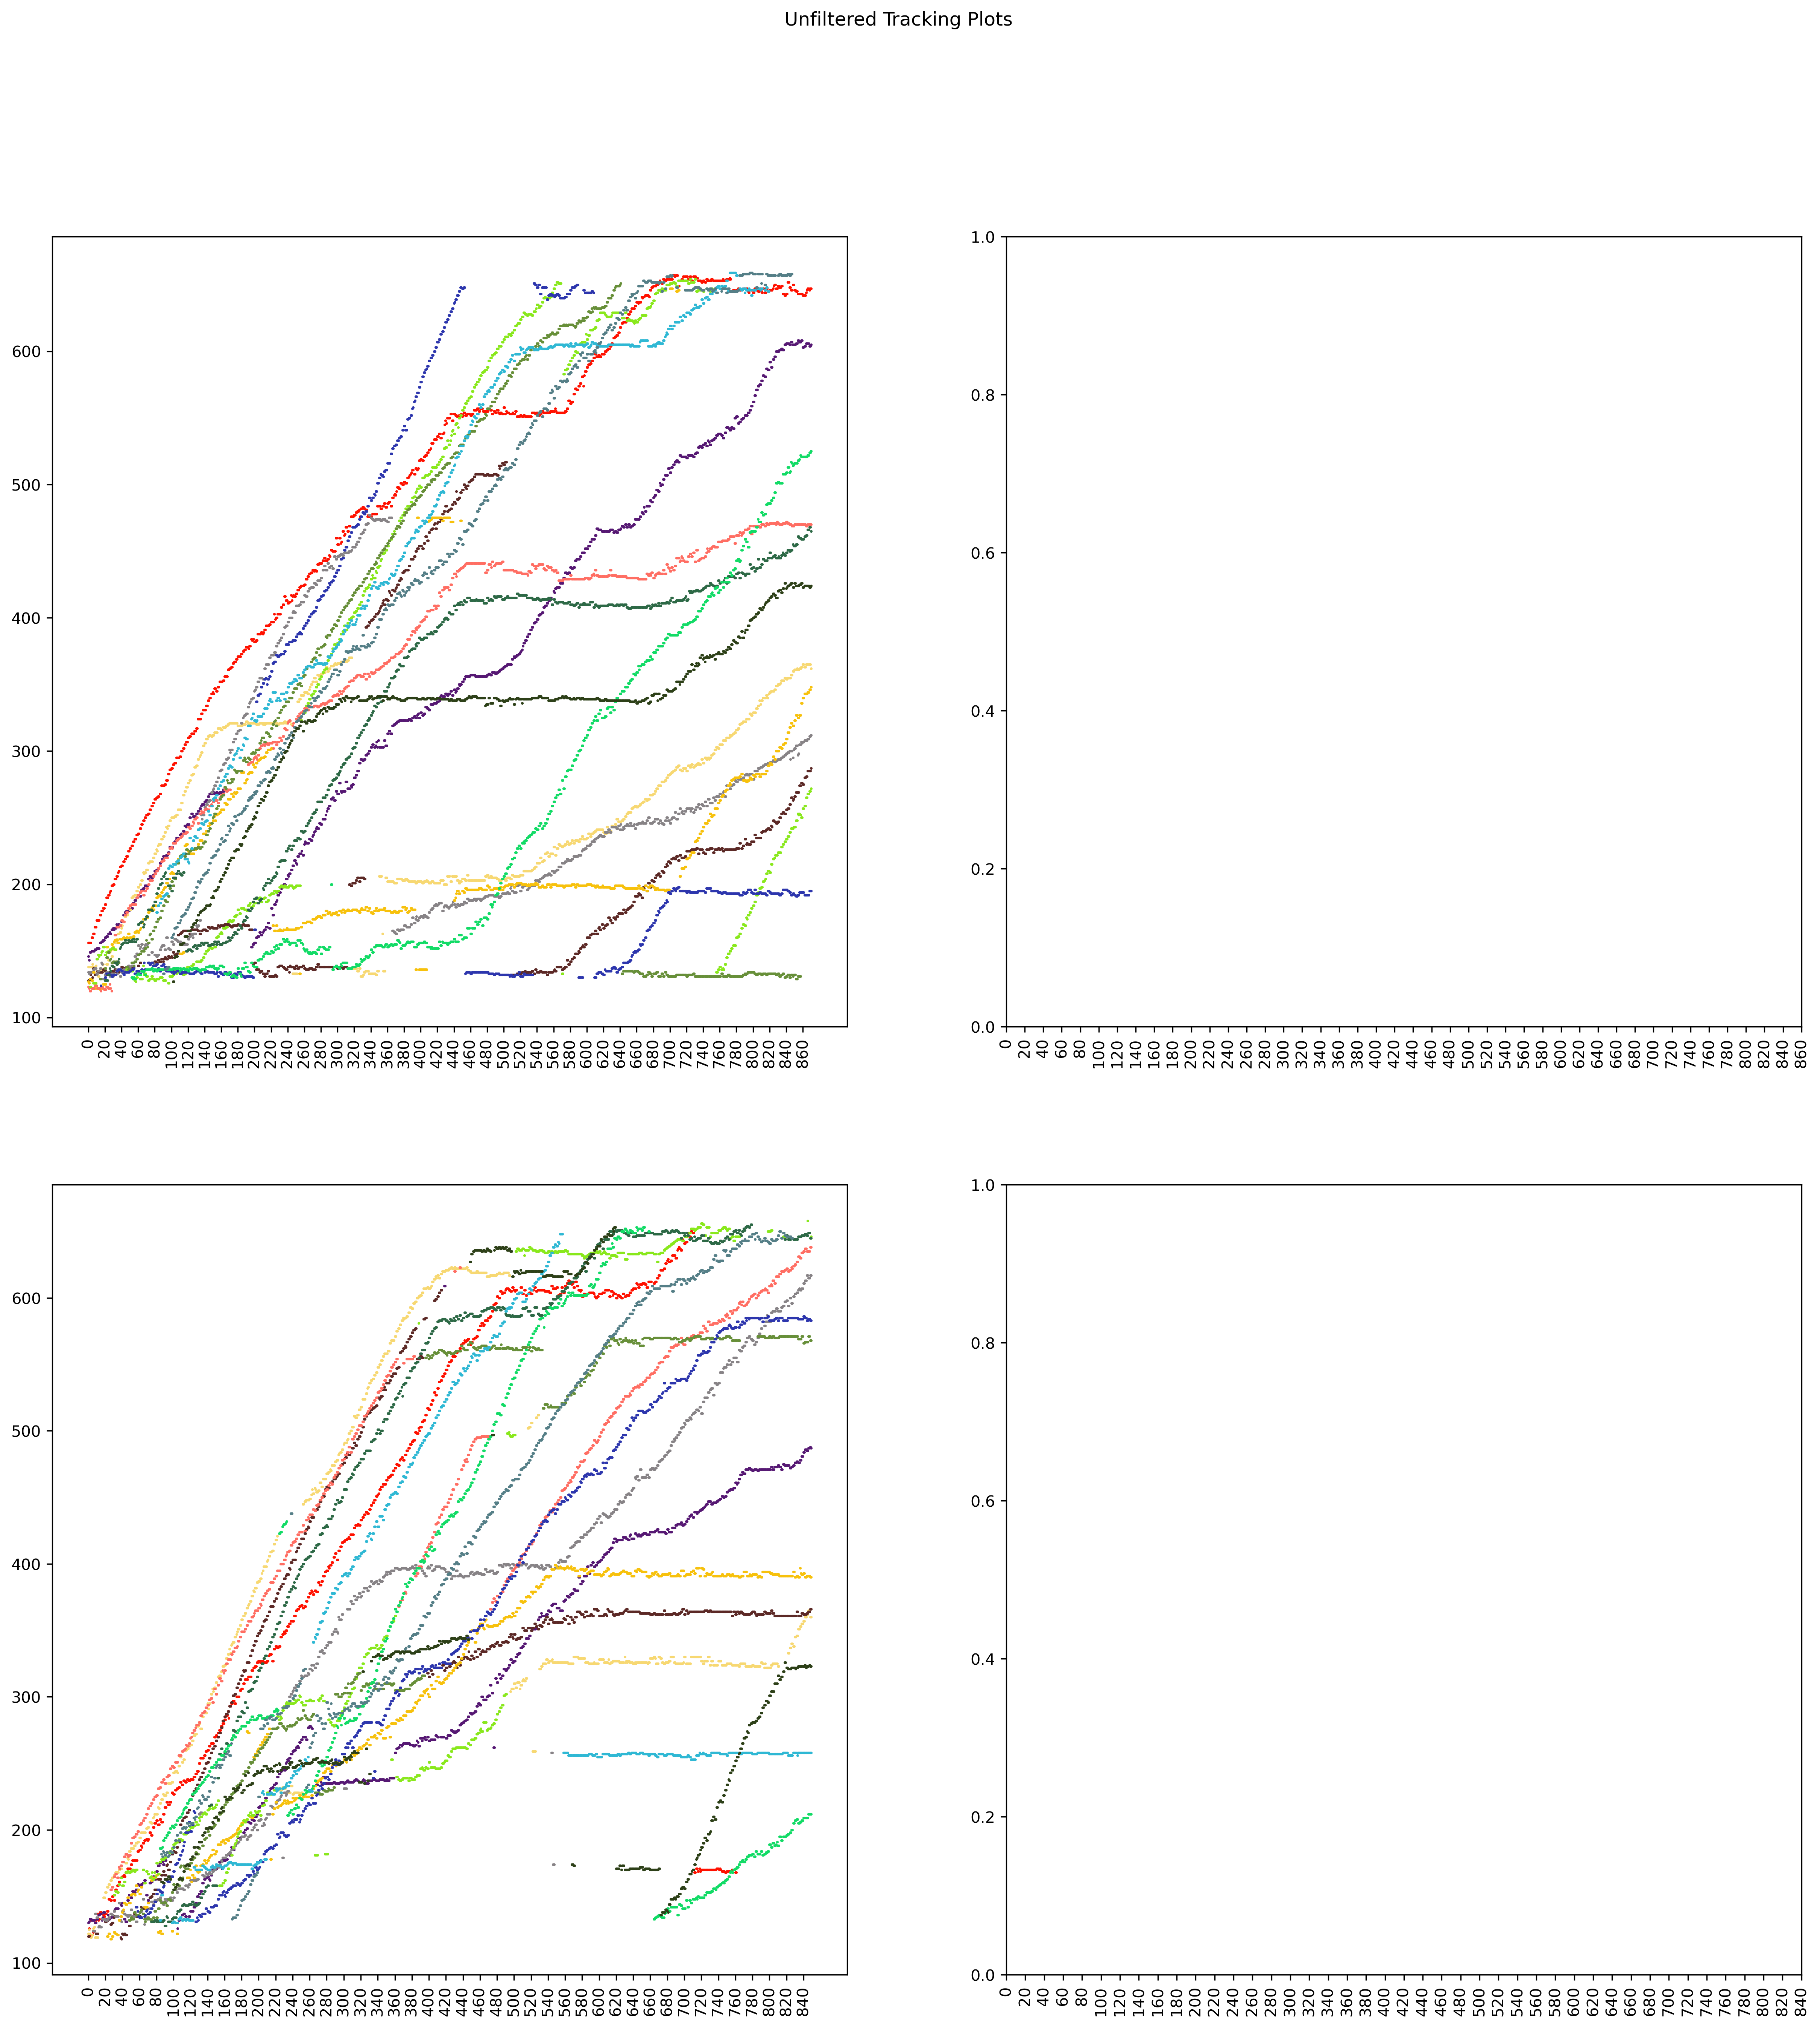

In [28]:
# Use binned avg?

fig, axes = plt.subplots(len(trim_nums), len(vials), figsize=(len(vials)*10, len(trim_nums)*10), dpi = 300)
if (len(trim_nums))==1: axes = [axes]
plt.suptitle("Unfiltered Tracking Plots")

for t in range(len(trim_nums)):
    v_num = 0
    for v in vials.keys():
        groups = [i for i in range(vials[v][4])]
        frames_in = [[] for i in range(vials[v][4])]
        axes[t][v_num].set_xticks(np.arange(0, trim_dict[t]["count"], 20))
        axes[t][v_num].tick_params(axis = 'x', labelrotation = 90)
        for g in groups:
            for f in range(trim_dict[t]["count"]):
                if (trim_dict[t]["vials"][v]["points"][f][g]) != [-1, -1]:
                    frames_in[g].append(f)
            axes[t][v_num].scatter(
                [f_in for f_in in frames_in[g]],
                [trim_dict[t]["vials"][v]["y2"]-trim_dict[t]["vials"][v]["points"][y][g][0] for y in frames_in[g]],
                marker = ".",
                s = 2,
                c=colors[g],
            )
        v_num+=1

plt.savefig(f"./output/{name}_output/Unfiltered_Plot_Trim{trim_nums}_Vial{[i for i in vials.keys()]}.png")

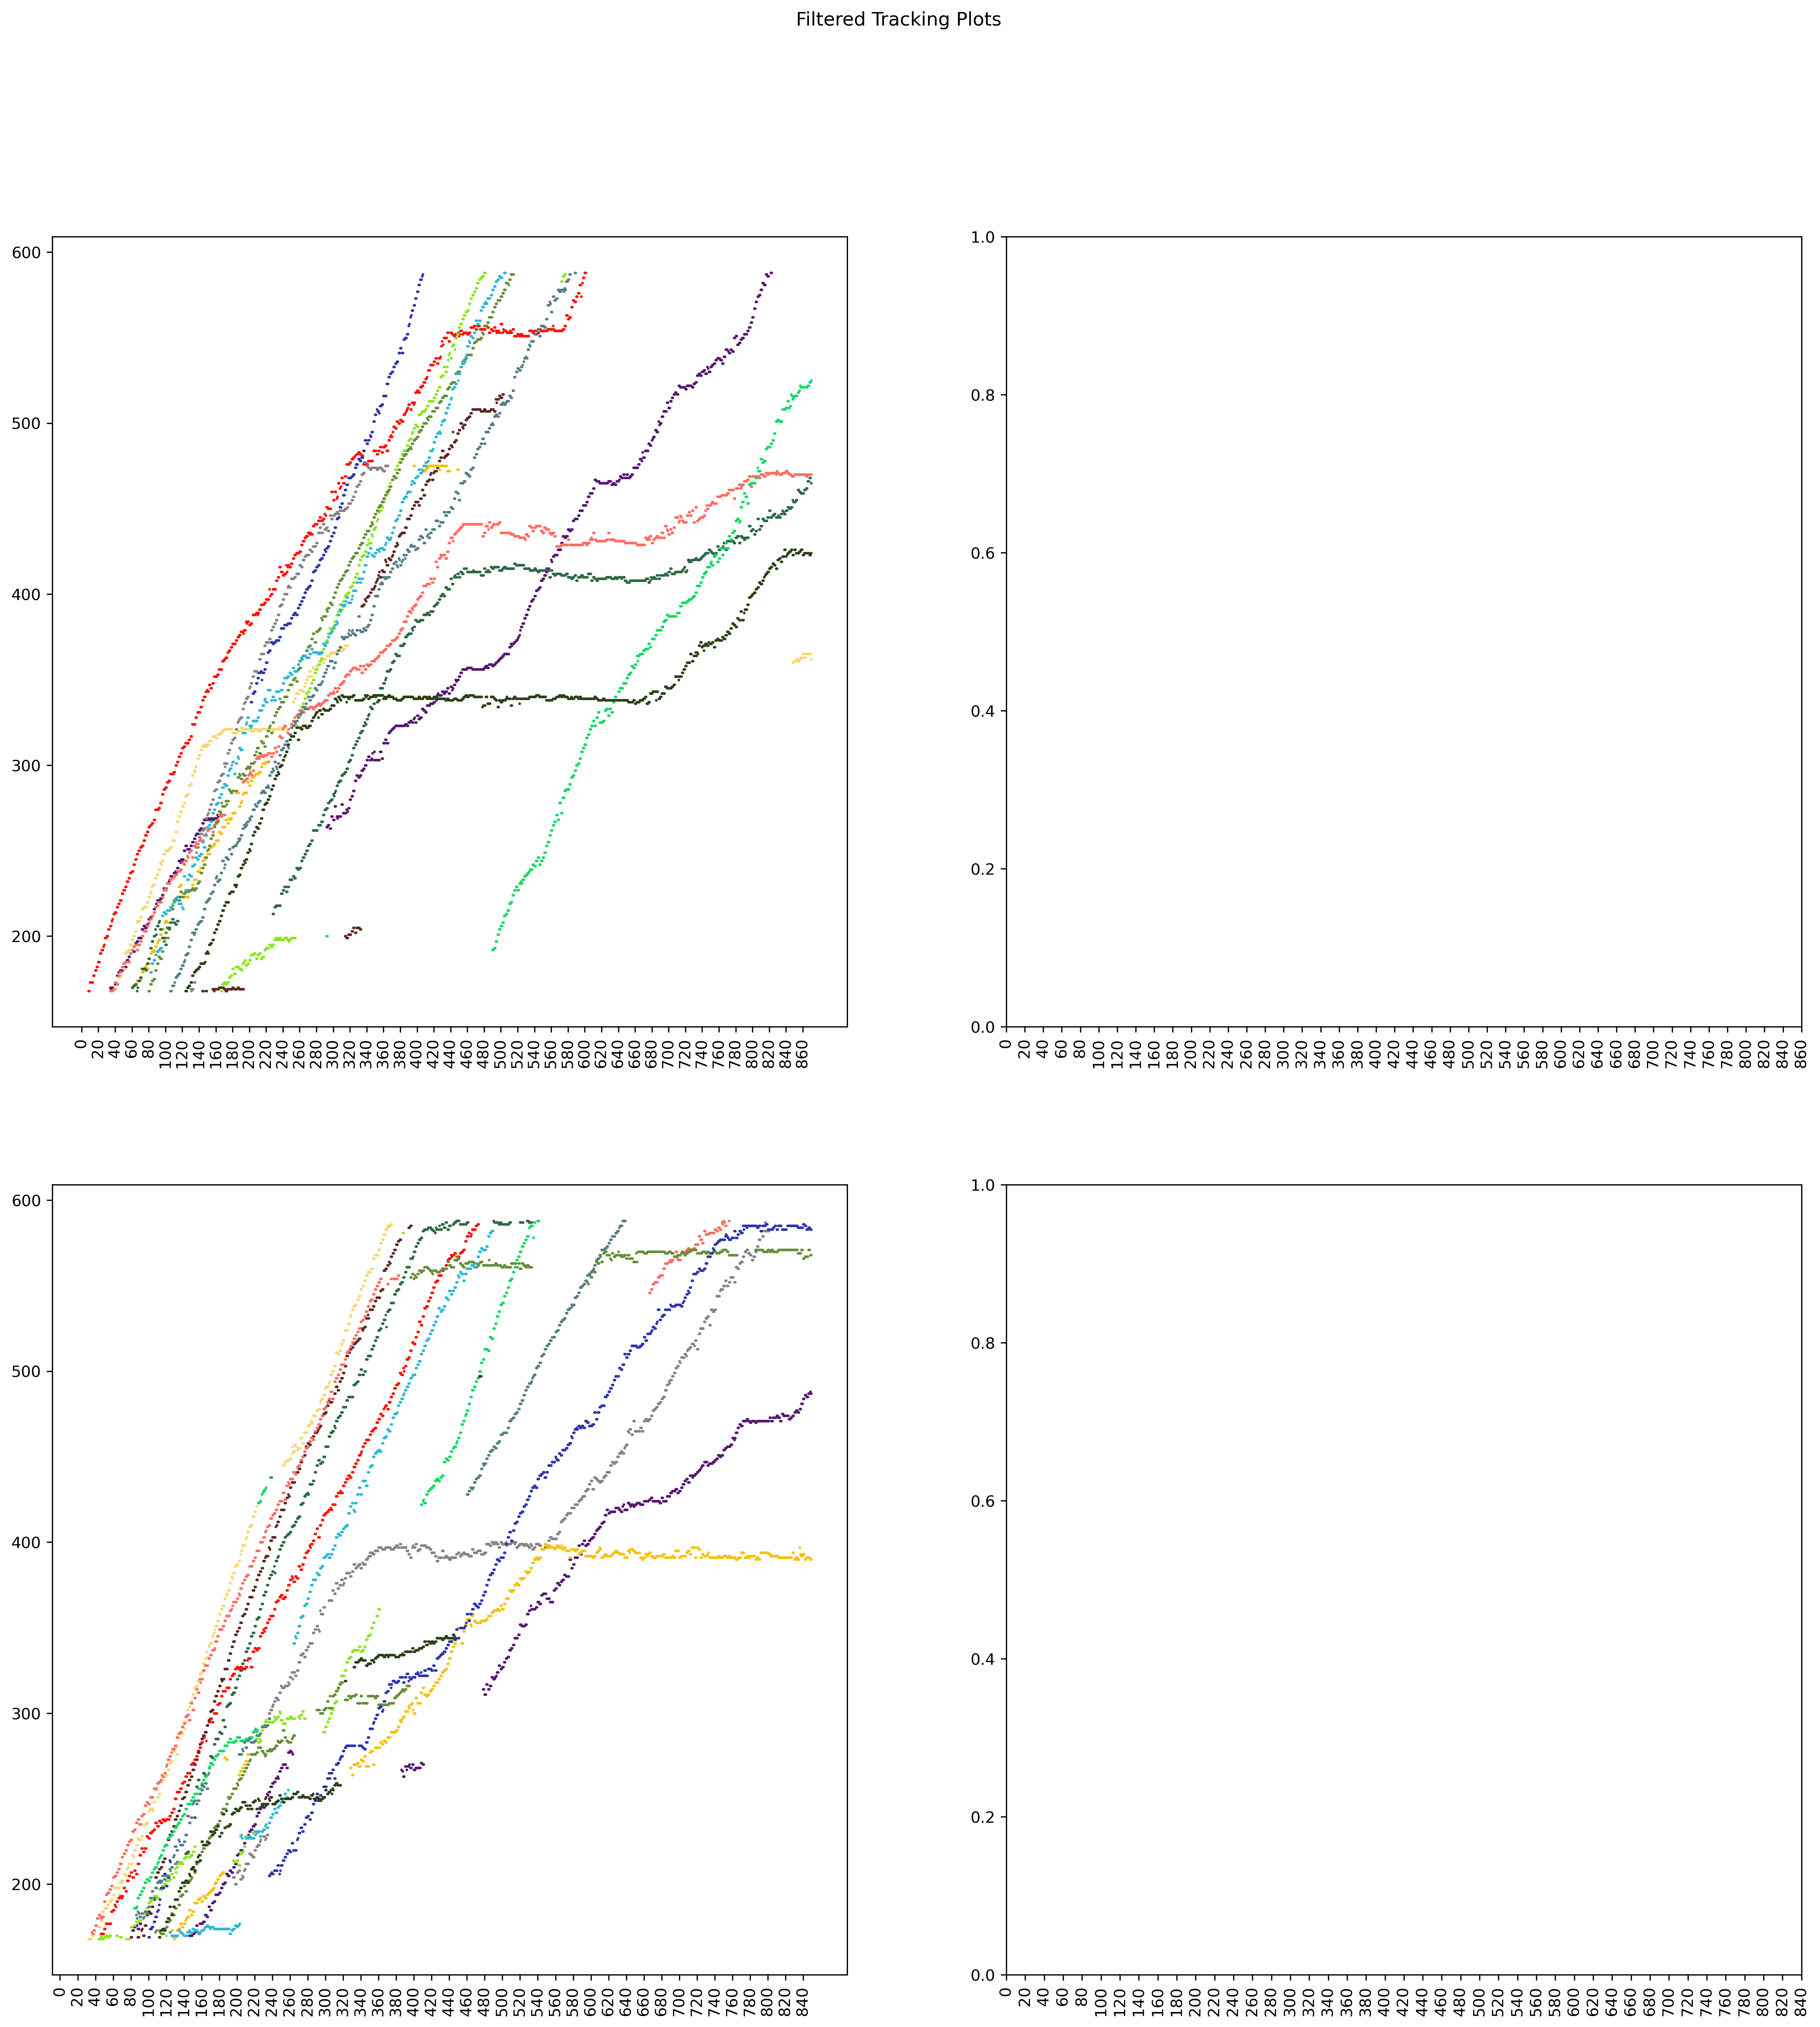

In [29]:
fig, axes = plt.subplots(len(trim_nums), len(vials), figsize=(len(vials)*10, len(trim_nums*10)), dpi = 300)
if (len(trim_nums))==1: axes = [axes]
plt.suptitle("Filtered Tracking Plots")

for t in range(len(trim_nums)):
    v_num = 0
    for v in vials.keys():
        groups = [i for i in range(vials[v][4])]
        frames_in = [[] for i in range(vials[v][4])]
        axes[t][v_num].set_xticks(np.arange(0, trim_dict[t]["count"], 20))
        axes[t][v_num].tick_params(axis = 'x', labelrotation = 90)
        for g in groups:
            for f in range(trim_dict[t]["count"]):
                if (trim_dict[t]["vials"][v]["filtered points"][f][g]) != [-1, -1]:
                    frames_in[g].append(f)
            axes[t][v_num].scatter(
                [f_in for f_in in frames_in[g]],
                [trim_dict[t]["vials"][v]["y2"]-trim_dict[t]["vials"][v]["filtered points"][y][g][0] for y in frames_in[g]],
                marker = ".",
                s = 2,
                c=colors[g],
            )
        v_num+=1

plt.savefig(f"./output/{name}_output/Filtered_Plot_Trim{trim_nums}_Vial{[i for i in vials.keys()]}.png")

In [30]:
# f = 23
# plus = 1



# plt.figure(figsize=(12,8), dpi = 150)

# # rect = Rectangle((0, 0), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
# # plt.gca().add_patch(rect)

# plt.imshow(get_sum(fg_bin_cropped[f],fg_bin_cropped[f+plus])[0], cmap = plt.get_cmap("Grays"))
# # plt.scatter([10 for i in range(n)], [t[f][0] for t in points], marker = ".", c="r", s=10, alpha=0.8)
# # plt.scatter([20 for i in range(n)], [t[f+plus][0] for t in points], marker = ".", c="w", s=10, alpha=0.8)

# for t in range(n):
#     if points[f][t]!=[-1, -1]:
#         plt.plot(points[f][t][1]-x1, points[f][t][0]-y1, marker = "+", color = colors[t])
# for t in range(n):
#     if points[f][t]!=[-1, -1]:
#         plt.plot(points[f+plus][t][1]-x1, points[f+plus][t][0]-y1, marker = "+", color = colors[t])

# #plt.plot(points[0][f], points[0][f+plus], color="w", alpha=0.5)

# for t in range(n):
#     if (points[f][t]!=[-1, -1] and points[f+plus][t]!=[-1, -1]):
#         plt.plot([points[f][t][1]-x1, points[f+plus][t][1]-x1], [points[f][t][0]-y1, points[f+plus][t][0]-y1], color = colors[t])
#         print("Pair", points[f][t], points[f+plus][t]);

# plt.show()

In [31]:
def get_path(t, v):
    path_tracing = []
    graph = [i for i in range(trim_dict[t]["vials"][v]["n flies"])]
    plt.figure(figsize=(8, 15), dpi=150)
    plt.imshow(trim_dict[t]["vials"][v]["c raw"][0])

    for g in tqdm(graph):
        path_tracing.append([])

        prev = []
        prev_ind = -1
        for f in range(trim_dict[t]["count"]):
            pnt = trim_dict[t]["vials"][v]["points"][f][g]

            if pnt!=[-1, -1]:
                prev = pnt
                prev_ind = f
                break;

        for f in range(prev_ind+1, trim_dict[t]["count"]):
            pnt = trim_dict[t]["vials"][v]["points"][f][g]

            if pnt!=[-1,-1]:
                if prev!=[-1,-1]:
                    plt.plot([prev[1], pnt[1]], [prev[0], pnt[0]], color = colors[g], marker=".", markersize=1)
                    prev = pnt
                else:
                    plt.plot(pnt[1], pnt[0], color = colors[g], marker=".", markersize = 1)
                    prev = pnt
            else:
                prev = [-1,-1]
    plt.show()
get_path(0, 7)

KeyError: 7

In [ ]:
progress_bar = None
title = None

def update_frame(f, t, v, ax1, ax2):
    global progress_bar
    global title
    ax1.clear()
    ax2.clear()

    ax1.imshow(trim_dict[t]["vials"][v]["c raw"][f])
    ax2.imshow(trim_dict[t]["vials"][v]["c bin"][f], cmap = plt.get_cmap("Purples"))
    title.set_text(f"Trim {trim_nums[t]} Vial {v} Frame {f}")

    points = trim_dict[t]["vials"][v]["points"]
    for g in range(trim_dict[t]["vials"][v]["n flies"]):
        if (trim_dict[t]["vials"][v]["points"][f][g] == [-1, -1]):
            continue;
        ax1.plot(points[f][g][1], points[f][g][0], marker = ".", color=colors[g], alpha=0.8, markersize=5)
        ax2.plot(points[f][g][1], points[f][g][0], marker = ".", color=colors[g], alpha=1, markersize=5)
    
    progress_bar.update(1)

def make_video(t, v):
    global progress_bar 
    global title
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    title = plt.suptitle(t='', fontsize = 20)

    total_frames = len(trim_dict[t]["vials"][v]["points"])

    progress_bar = tqdm(total=total_frames)

    vid = animation.FuncAnimation(
        fig, 
        update_frame,
        frames = total_frames,
        fargs=(t, v, ax1, ax2),
        repeat=False
    )

    return vid;

writer = FFMpegWriter(fps=1, codec='libx264')

for t in range(len(trim_nums)):
    print("Trim", trim_nums[t])
    for v in vials.keys():
        print("       Vial", v)
        video = make_video(t, v)
        video.save(f"./output/{name}_output/Set{set}_Trim{trim_nums[t]}_Vial{v}_Tracking.mp4", writer=writer)
        progress_bar.close()

In [32]:
def to_list(str):
    lis = str.strip("][").split(", ")
    ret = [eval(i) for i in lis]
    return ret;

colors = [
    "#ff1100", "#561873", "#f7d872", "#5c2926","#878386",
    "#f7c10c", "#ff6e63", "#89e81c", "#678f39","#2d36ad",
    "#2d6946", "#12db66", "#2fb8d4", "#557f87", "#2d4018",
    "#234e57", "#6066b5", "#9a60b5", "#d1288d", "#533278"
]

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from matplotlib.patches import Rectangle
import cv2
import ipywidgets as widgets
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

In [ ]:
# csv to unfiltered plot

trim_display = [1, 2]
vial_display = [0, 1, 2, 3, 4]
set=2
name = f"Dev_SetRun{set}_W1118_CLK_out_2.5wk_Jan_31_2025"

fig, axes = plt.subplots(len(trim_display), len(vial_display), figsize=(len(vial_display)*10, len(trim_display*10)), dpi = 150)
if (len(trim_display))==1: axes = [axes]
if (len(vial_display)) == 1:
    for i in range(trim_display):
        axes[i] = [axes[i]]
plt.suptitle(f"{name} Unfiltered Tracking Plots for Trim {trim_display} Vial {vial_display}")

for t in range(len(trim_display)):
    v_num = 0
    for v in vial_display:
        d = pd.read_csv(f"./output/{name}_output/Set{set}_Trim{trim_display[t]}_Vial{v}_Data.csv")
        md = pd.read_csv(f"./output/{name}_output/Set{set}_Trim{trim_display[t]}_Vial{v}_MetaData.csv")

        groups = [i for i in range(md.get("Fly Count")[0])]
        frames_in = [[] for i in range(md.get("Fly Count")[0])]

        axes[t][v_num].set_xticks(np.arange(0, md.get("Frame Count")[0], 20))
        axes[t][v_num].tick_params(axis = 'x', labelrotation = 90)

        for g in groups:
            column = d.get(f"Unfiltered {g+1}")
            column = [to_list(i) for i in column]

            for f in range(md.get("Frame Count")[0]):
                if column[f] != [-1, -1]:
                    frames_in[g].append(f)
            axes[t][v_num].scatter(
                [f_in for f_in in frames_in[g]],
                [md.get("y2")[0]-column[f][0] for f in frames_in[g]],
                marker = ".",
                s = 2,
                c=colors[g],
            )
        v_num+=1

for x in range(len(axes[0])):
    axes[0][x].set_title(f"Vial {vial_display[x]}")
for x in range(len(axes)):
    axes[x][0].set_ylabel(f"Trim {trim_display[x]}", rotation=0, size='large')

plt.savefig(f"./output/{name}_output/UnfilteredPlot_Trim{trim_display}_Vial{vial_display}.png")

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, 0, 3, 3, 3, 3, 5, 5, -1, 5, -1, -1, -1, 5, 7, 7, 9, 9, 13, 13, 14, -1, 14, 14, 20, 20, 24, 24, 25, 25, -1, 25, 30, 30, 32, 32, 39, 39, -1, 39, 44, 44, 48, 48, 48, 48, 53, 53, 55, 55, 58, 58, 58, 58, 59, 59, -1, 59, 64, -1, 68, 68, 69, 69, -1, 69, 74, 74, 77, 78, -1, 78, 89, 89, -1, 89, 89, 89, 91, 91, -1, 91, 98, 98, -1, 98, 100, -1, 102, 102, 104, 104, -1, 104, 106, 106, 117, 117, -1, 117, 127, -1, 127, 127, 128, 128, 134, 134, 135, 135, 137, 137, -1, 137, 137, 138, 139, 139, 142, 142, 142, 142, -1, 142, -1, 142, 144, 144, -1, 144, 148, 148, 149, 149, -1, 149, 155, -1, -1, 155, 157, 157, 157, 157, 157, -1, 158, 158, 161, -1, 163, 163, -

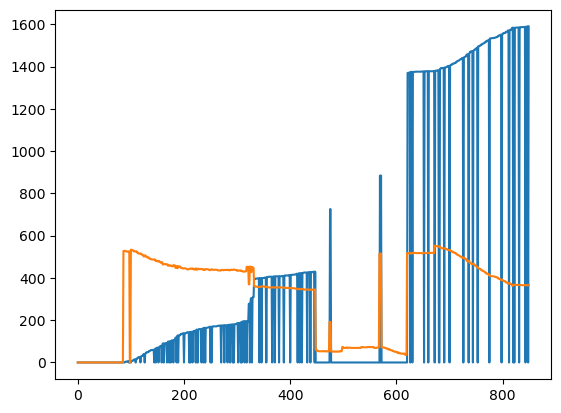

In [38]:
# Extra filtering

trim_display = [3, 4]
vial_display = [4]

y_bound = [150, 600]
thresh = 0
fell_down_thresh = -10

for t in range(len(trim_display)):
    vial_num = 1
    for v in vial_display:
        d = pd.read_csv(f"./output/{name}_output/Set{set}_Trim{trim_display[t]}_Vial{v}_Data.csv")
        md = pd.read_csv(f"./output/{name}_output/Set{set}_Trim{trim_display[t]}_Vial{v}_MetaData.csv")

        groups = [i for i in range(md.get("Fly Count")[0])]
        fp = [[] for i in range(len(groups))]
        went_down = [False for i in range(len(groups))]

        for g in groups:
            last = []
            first = []
            last_valid = []
            poi = d[f"Unfiltered {g+1}"]
            cnt = 0
            for p in poi:
                cnt+=1
                p = to_list(p)
                if p == [-1, -1]:
                    fp[g].append([-1, -1])
                elif last == []:
                    last = p
                    first = p
                    last_valid = p
                    if (p[0]>y_bound[0] and p[0]<y_bound[1]):
                        fp[g].append([0, p[1]])
                    else: fp[g].append([-1, -1])
                else:
                    ydiff = last[0]-p[0]
                    if (ydiff>=thresh):
                        if (p[0]>y_bound[0] and p[0]<y_bound[1]):
                            fp[g].append([(first[0]-last_valid[0])+ydiff, p[1]])
                        else: fp[g].append([-1, -1])
                        last_valid = [last_valid[0]-ydiff, p[1]]
                    else:
                        fp[g].append([-1, -1])
                    last = p
                    if (ydiff<fell_down_thresh):
                        went_down[g] = True
                
        de = {}
        for g in range(len(groups)):
            de[f"Unfiltered {g+1}"] = d[f"Unfiltered {g+1}"]
        for g in range(len(groups)):
            de[f"Filtered {g+1}"] = fp[g]
        pd.DataFrame(de).to_csv(f'./output/{name}_output/Set{set}_Trim{trim_display[t]}_Vial{v}_NewData.csv')
        vial_num+=1
        wd = {}
        for g in range(len(groups)):
            wd[f"Fly {g}"] = went_down[g]
        pd.DataFrame(list(wd.items()), columns=["Fly", "WentDown"]).to_csv(f'./output/{name}_output/Set{set}_Trim{trim_display[t]}_Vial{v}_WentDown.csv')

plt.plot([i for i in range(len(poi))], [j[0] for j in fp[g]])

# Plot the second set of y-values
plt.plot([i for i in range(len(poi))], [to_list(p)[0] for p in poi])
print([j[0] for j in fp[g]])
print([to_list(p)[0] for p in poi])


TypeError: 'list' object cannot be interpreted as an integer

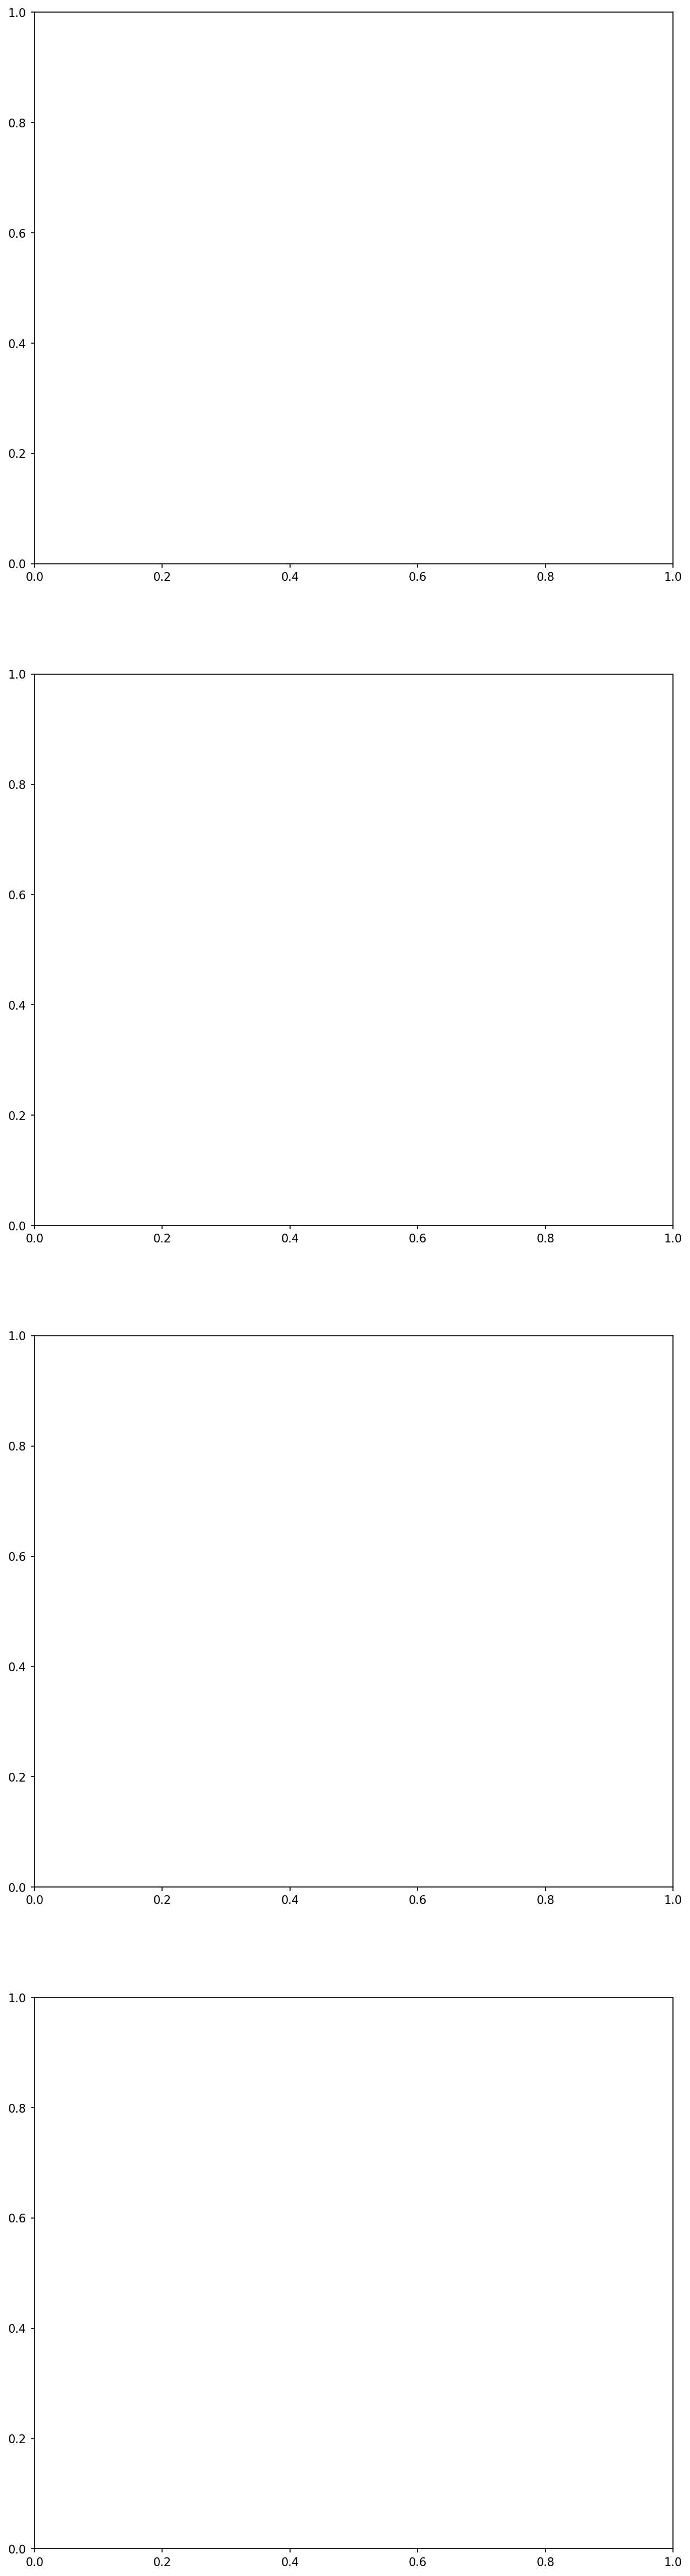

In [41]:
# csv to filtered plot

trim_display = [1,2, 3, 4]
vial_display = [4]

fig, axes = plt.subplots(len(trim_display), len(vial_display), figsize=(len(vial_display)*10, len(trim_display*10)), dpi = 150)
if (len(trim_display))==1: axes = [axes]
if (len(vial_display)) == 1:
    for i in range(trim_display):
        axes[i] = [axes[i]]
plt.suptitle(f"Filtered Tracking Plots for Trim {trim_display} Vial {vial_display}")

for t in range(len(trim_display)):
    v_num = 0
    for v in vial_display:
        d = pd.read_csv(f"./output/{name}_output/Set{set}_Trim{trim_display[t]}_Vial{v}_NewData.csv")
        md = pd.read_csv(f"./output/{name}_output/Set{set}_Trim{trim_display[t]}_Vial{v}_MetaData.csv")

        groups = [i for i in range(md.get("Fly Count")[0])]
        frames_in = [[] for i in range(md.get("Fly Count")[0])]

        axes[t][v_num].set_xticks(np.arange(0, md.get("Frame Count")[0], 20))
        axes[t][v_num].tick_params(axis = 'x', labelrotation = 90)

        for g in groups:
            column = d.get(f"Filtered {g+1}")
            column = [to_list(i) for i in column]

            for f in range(md.get("Frame Count")[0]):
                if column[f] != [-1, -1]:
                    frames_in[g].append(f)
            axes[t][v_num].scatter(
                [f_in for f_in in frames_in[g]],
                [column[f][0] for f in frames_in[g]],
                marker = ".",
                s = 2,
                c=colors[g],
            )
        v_num+=1

for x in range(len(axes[0])):
    axes[0][x].set_title(f"Vial {vial_display[x]}")
for x in range(len(axes)):
    axes[x][0].set_ylabel(f"Trim {trim_display[x]}", rotation=0, size='large')

plt.savefig(f"./output/{name}_output/NewFiltered_Plot_Trim{trim_display}_Vial{vial_display}.png")

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

set = 2
name = "Dev_Set2_W1118_CUT_Aug_20_2024"

In [19]:
def to_list(str):
    lis = str.strip("][").split(", ")
    ret = [eval(i) for i in lis]
    return ret;

colors = [
    "#2d6946", "#12db66", "#2fb8d4", "#557f87", "#2d4018",
    "#ff1100", "#561873", "#f7d872", "#5c2926","#878386",
    "#f7c10c", "#ff6e63", "#89e81c", "#678f39","#2d36ad",
    "#234e57", "#6066b5", "#9a60b5", "#d1288d", "#533278"
]

def get_distance(p1, p2):
    return ((((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2))**(0.5));

def find_mins(present, last, remember_ind):
    min_distance = []
    for p in range(len(present)): # First index is paired present location, second is old paired location
        min_dist = 9999
        index = -1
        if present[p] == [-1, -1]:
            continue;

        for l in range(len(last)):
            if (last[l] == [-1, -1]):
                continue;
            distance = get_distance(present[p], last[l])
            if (l in remember_ind): distance+=10
            
            if distance<min_dist:
                min_dist = distance
                index = l;
        min_distance.append([min_dist, p, index]) # minimum distance, present, old
    return min_distance

Yee


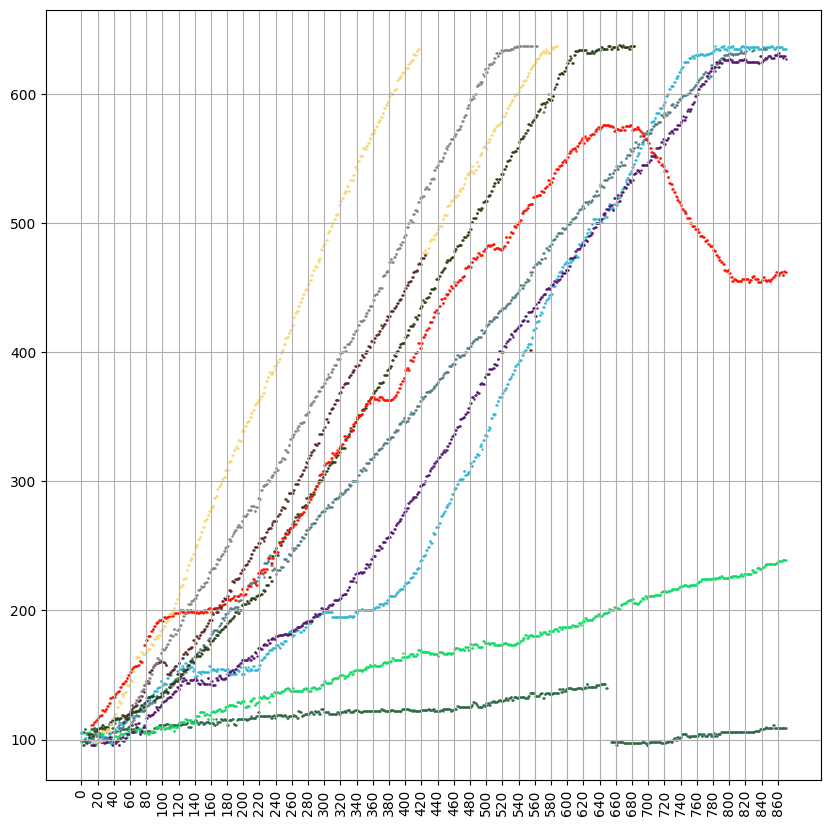

In [21]:
# For debugging the linking process
# Uses final tracking data from the csv and re-links points
def get_points_debug(s, t, v):
    setup_clc = pd.read_csv(f"./output/{name}_output/regular/Set{s}_Trim{t}_Vial{v}_Data.csv")
    setup_meta = pd.read_csv(f"./output/{name}_output/regular/Set{s}_Trim{t}_Vial{v}_MetaData.csv")
    clc = [[] for f in range(setup_meta["Frame Count"][0])]
    for g in range(setup_meta["Fly Count"][0]):
        for f in range(setup_meta["Frame Count"][0]):
            if setup_clc[f"Unfiltered {g+1}"][f]!='[-1, -1]':
                clc[f].append(to_list(setup_clc[f"Unfiltered {g+1}"][f]))

    points = [[]];
    stop=[420]
    n = setup_meta["Fly Count"][0]
    for g in range(len(clc[0])): # Put in first frame values
        points[0].append(clc[0][g]);
    for r in range(n-len(clc[0])):
        points[0].append([-1, -1]) # (-1, -1) = invalid, not in frame

    residuals = []

    found = len(clc[0])
    remember = [[-1, -1] for i in range(n)]

    for frame in range(1, len(clc)): # for each frame
        last = points[frame-1][:]
        present = clc[frame][:]

        remember_ind = [] # Adding remember into last and figuring out ind to take out
        for re in range(len(remember)):
            if remember[re] != [-1, -1]:
                remember_ind.append(re)
                # if last[re] != [-1, -1]:it's possible it's just rewriting the same remember from last frame
                last[re] = remember[re]

        positions = [[-1, -1] for i in range(n)]

        new_need = [i for i in range(len(present))] # New groups that need to be paired
        old_need = []                               # Old groups that need to be paired
        for i in range(len(last)):
            if last[i] != [-1, -1]:
                old_need.append(i)
                
        frame_residuals = []

        min_distance = sorted(find_mins(present, last, remember_ind)) # For each group: [min_dist, paired new index, closest old index]

        if (frame in stop):
            print("Yee")
            # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
            # ax1.imshow(fg_bin[frame-1])
            # ax2.imshow(fg_bin[frame])
            # for t in range(len(min_distance)):
            #     ax1.plot([clc[frame-1][min_distance[t][2]][1],clc[frame][min_distance[t][1]][1]],[clc[frame-1][min_distance[t][2]][0],clc[frame][min_distance[t][1]][0]], marker = "+")
            # for t in range(len(lc[frame-1])):
            #     ax1.scatter([lc[frame-1][t][1]], [lc[frame-1][t][0]], s=1)
            # for t in range(len(lc[frame])):
            #     ax2.scatter([lc[frame][t][1]], [lc[frame][t][0]], s=1)

        for o in range(len(old_need)):
            if len(new_need)>0:
                if (min_distance[o][2] not in old_need or min_distance[o][1] not in new_need):
                    del min_distance[o:]
                    f_present = [[-1, -1] for i in present]
                    f_last = [[-1, -1] for i in last]
                    for ne in new_need:
                        f_present[ne] = present[ne]
                    for ol in old_need:
                        f_last[ol] = last[ol]
                    for item in sorted(find_mins(f_present, f_last, remember_ind)):
                        min_distance.append(item)

                positions[min_distance[o][2]] = present[min_distance[o][1]]
                frame_residuals.append(round(min_distance[o][0], 2))

                if min_distance[o][2] in remember_ind:
                    remember[min_distance[o][2]] = [-1, -1]
                old_need.remove(min_distance[o][2])
                new_need.remove(min_distance[o][1])
            else: # Should not get here before new, all new paired, old leftover and remember
                break;
        
        for ol in old_need:
            remember[ol] = last[ol]

        if (len(present)>found):
            old_found = found
            found = len(present)
            i = 0
            for ne in new_need:
                positions[old_found+i] = present[ne][:]
                i+=1;

        points.append(positions)
        residuals.append(frame_residuals)

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_xticks(np.arange(0, setup_meta["Frame Count"][0], 20))
    ax.tick_params(axis = 'x', labelrotation = 90)

    groups = [i for i in range(setup_meta["Fly Count"][0])]
    frames_in = [[] for i in range(setup_meta["Fly Count"][0])]
    for g in groups:
        for f in range(setup_meta["Frame Count"][0]):
                if (points[f][g]) != [-1, -1]:
                    frames_in[g].append(f)
        ax.scatter(
                [f_in for f_in in frames_in[g]],
                [setup_meta["y2"][0]-points[y][g][0] for y in frames_in[g]],
                marker = ".",
                s = 2,
                c=colors[g]
            )
    plt.grid()

get_points_debug(set, 2, 5)